In [1]:
import os
import pickle

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime 

import matplotlib.cm as cm
cmap = plt.cm.RdYlGn#sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# Setup Seaborn
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style("whitegrid", {'axes.grid' : True})

In [2]:
with open('../Data/Crisis_data_cleaned.txt', 'rb') as f:
    results = pickle.load(f)

In [3]:
df = pd.DataFrame.from_records(results)
#df.info()

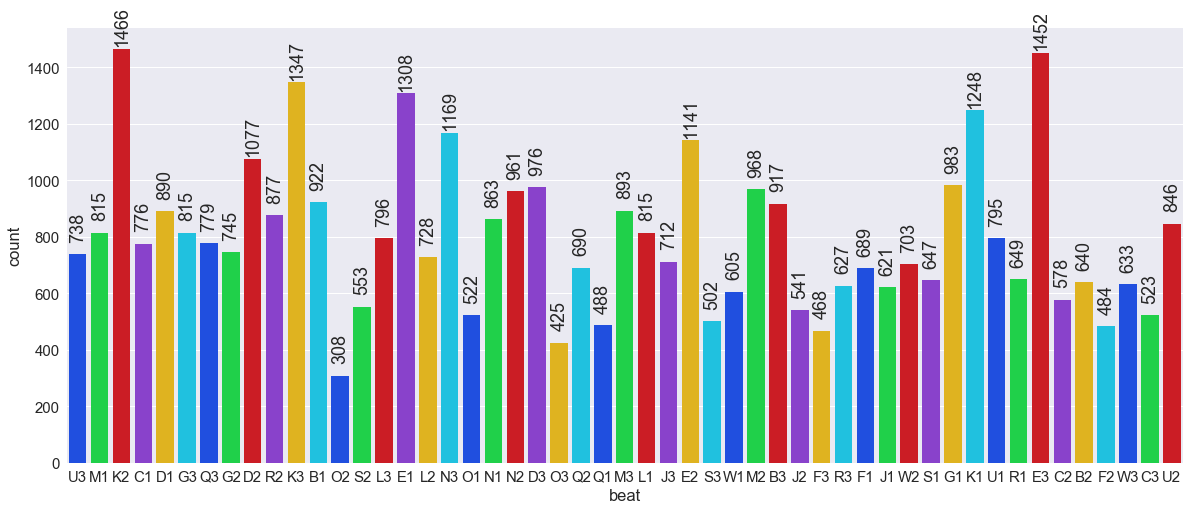

In [4]:
sns.set(font_scale=1.5)
ax = sns.countplot(df.beat, palette="bright")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+100,'%.0f'%(height), rotation=90)
plt.show()

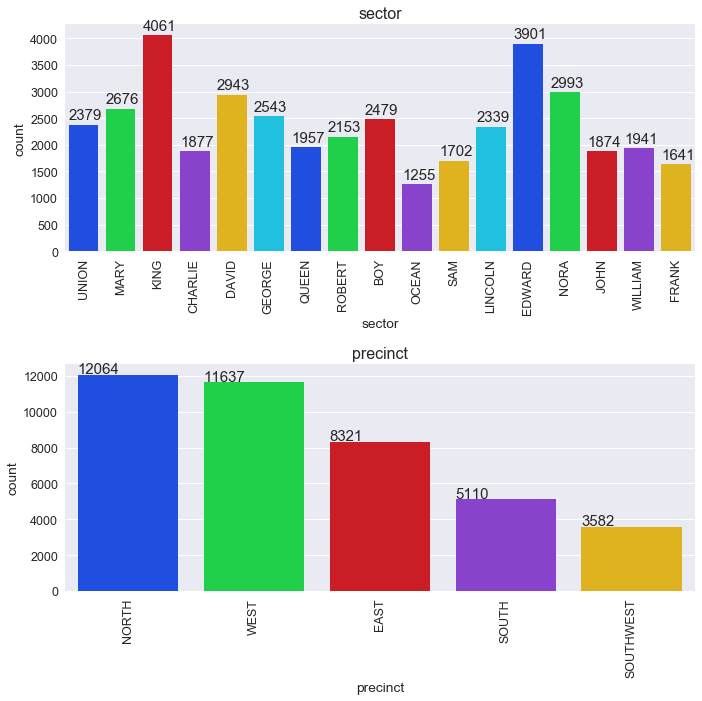

In [5]:
sns.set(font_scale=1.25)
x_colnames = ['sector','precinct']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(10,10), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], palette="bright")
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) , fontsize=16)
    for p in axes.patches:
        height = p.get_height()
        axes.text(p.get_x(), height+100, '%.0f'%(height))
plt.tight_layout()

In [6]:
precinct_sector = df[['precinct','sector']].groupby(['precinct','sector']).size().reset_index()

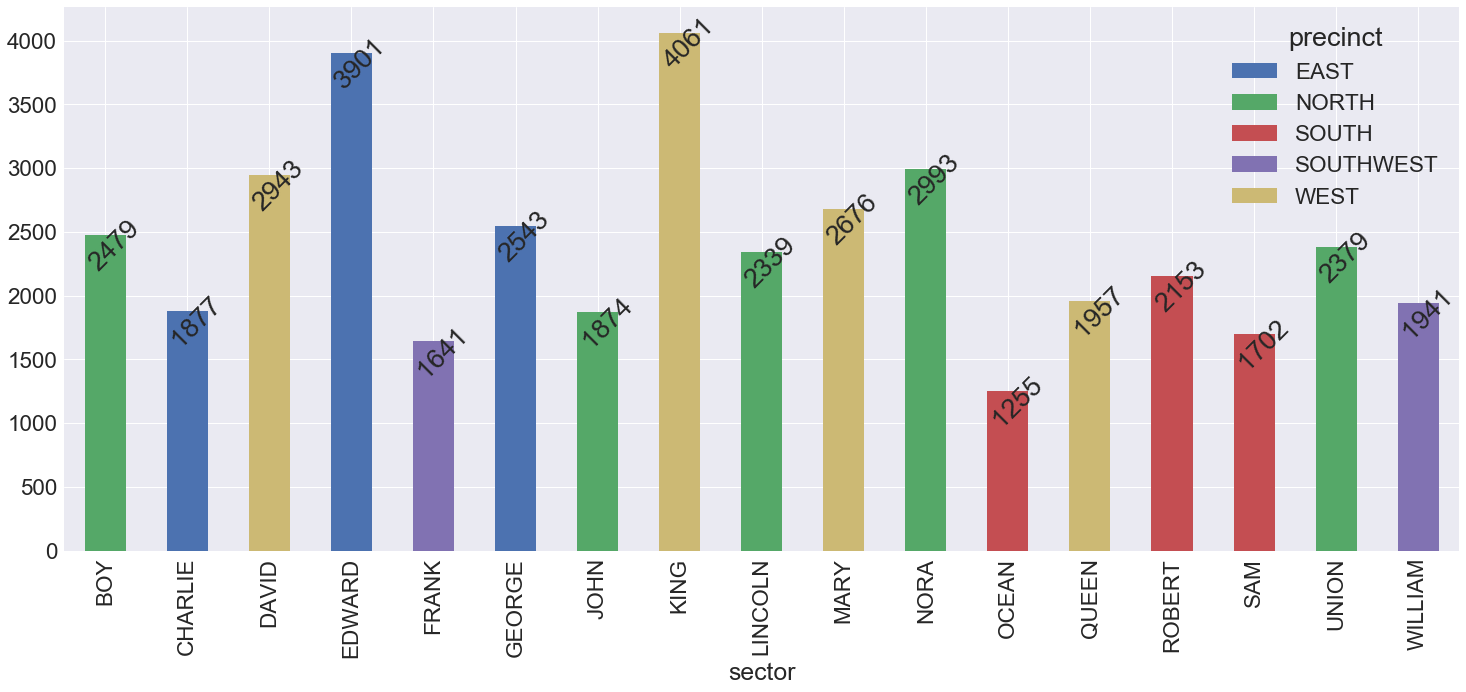

In [7]:
sns.set(font_scale=2.25)

crosstab = pd.crosstab(index=df['sector'],columns=df['precinct'])
ax = crosstab.plot(kind='bar',figsize=(25,10), stacked=True)

for p in ax.patches:
    height = p.get_height()
    if (height > 1000):
        ax.text(p.get_x(), height, '%.0f'%height, rotation=45)
plt.show()

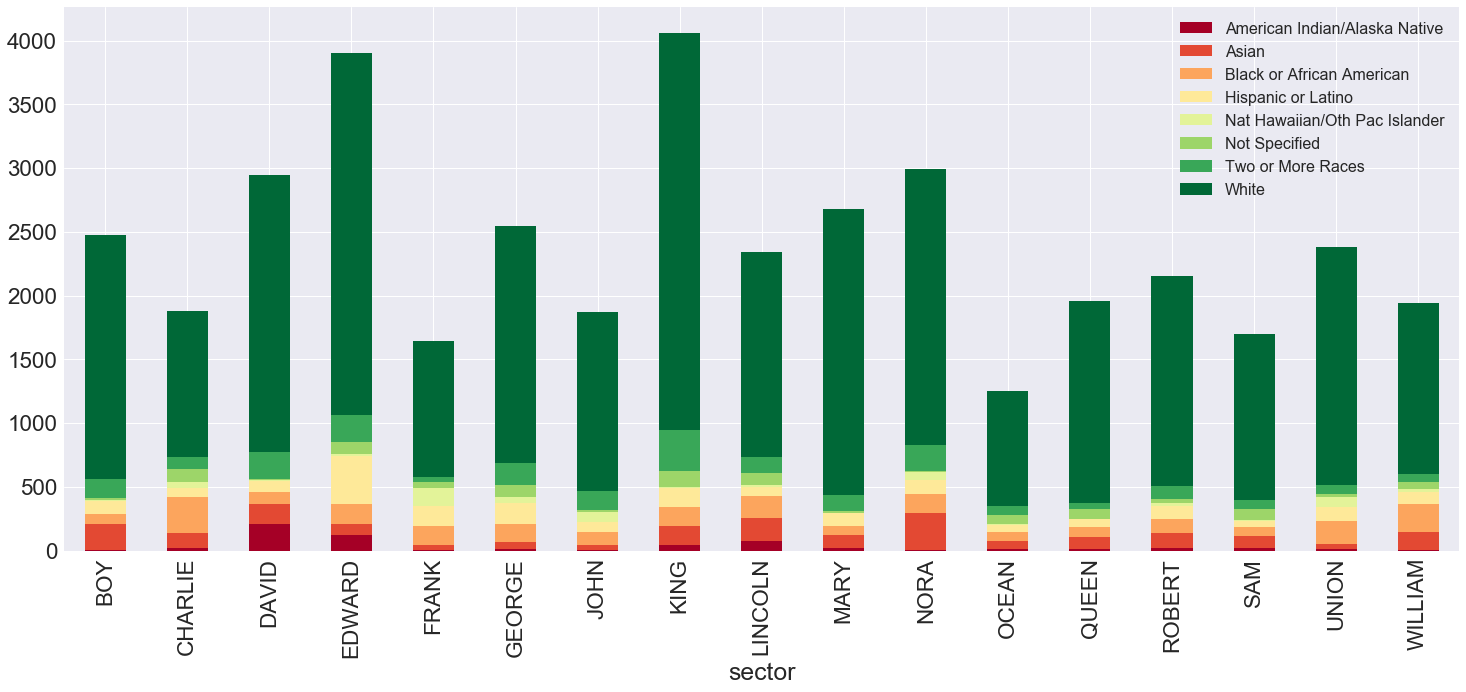

In [8]:
crosstab = pd.crosstab(index=df['sector'],columns=df['officer_race'])
ax = crosstab.plot(kind='bar',figsize=(25,10), stacked=True, cmap=cmap)
plt.legend(fontsize=16)
plt.show()

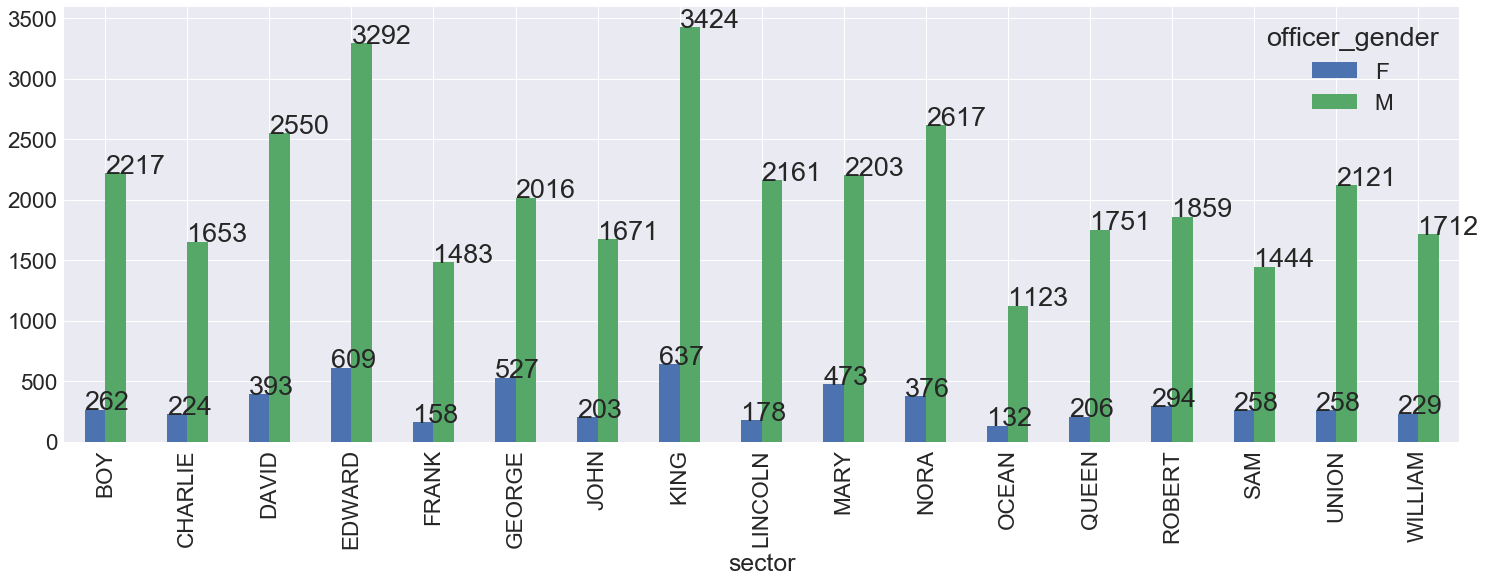

In [9]:
crosstab = pd.crosstab(index=df['sector'],columns=df['officer_gender'])
ax = crosstab.plot(kind='bar',figsize=(25,8), stacked=False)
for p in ax.patches:
    height = p.get_height()
    if(height > 1):
        ax.text(p.get_x(), height, '%.0f'%(height))
plt.show()

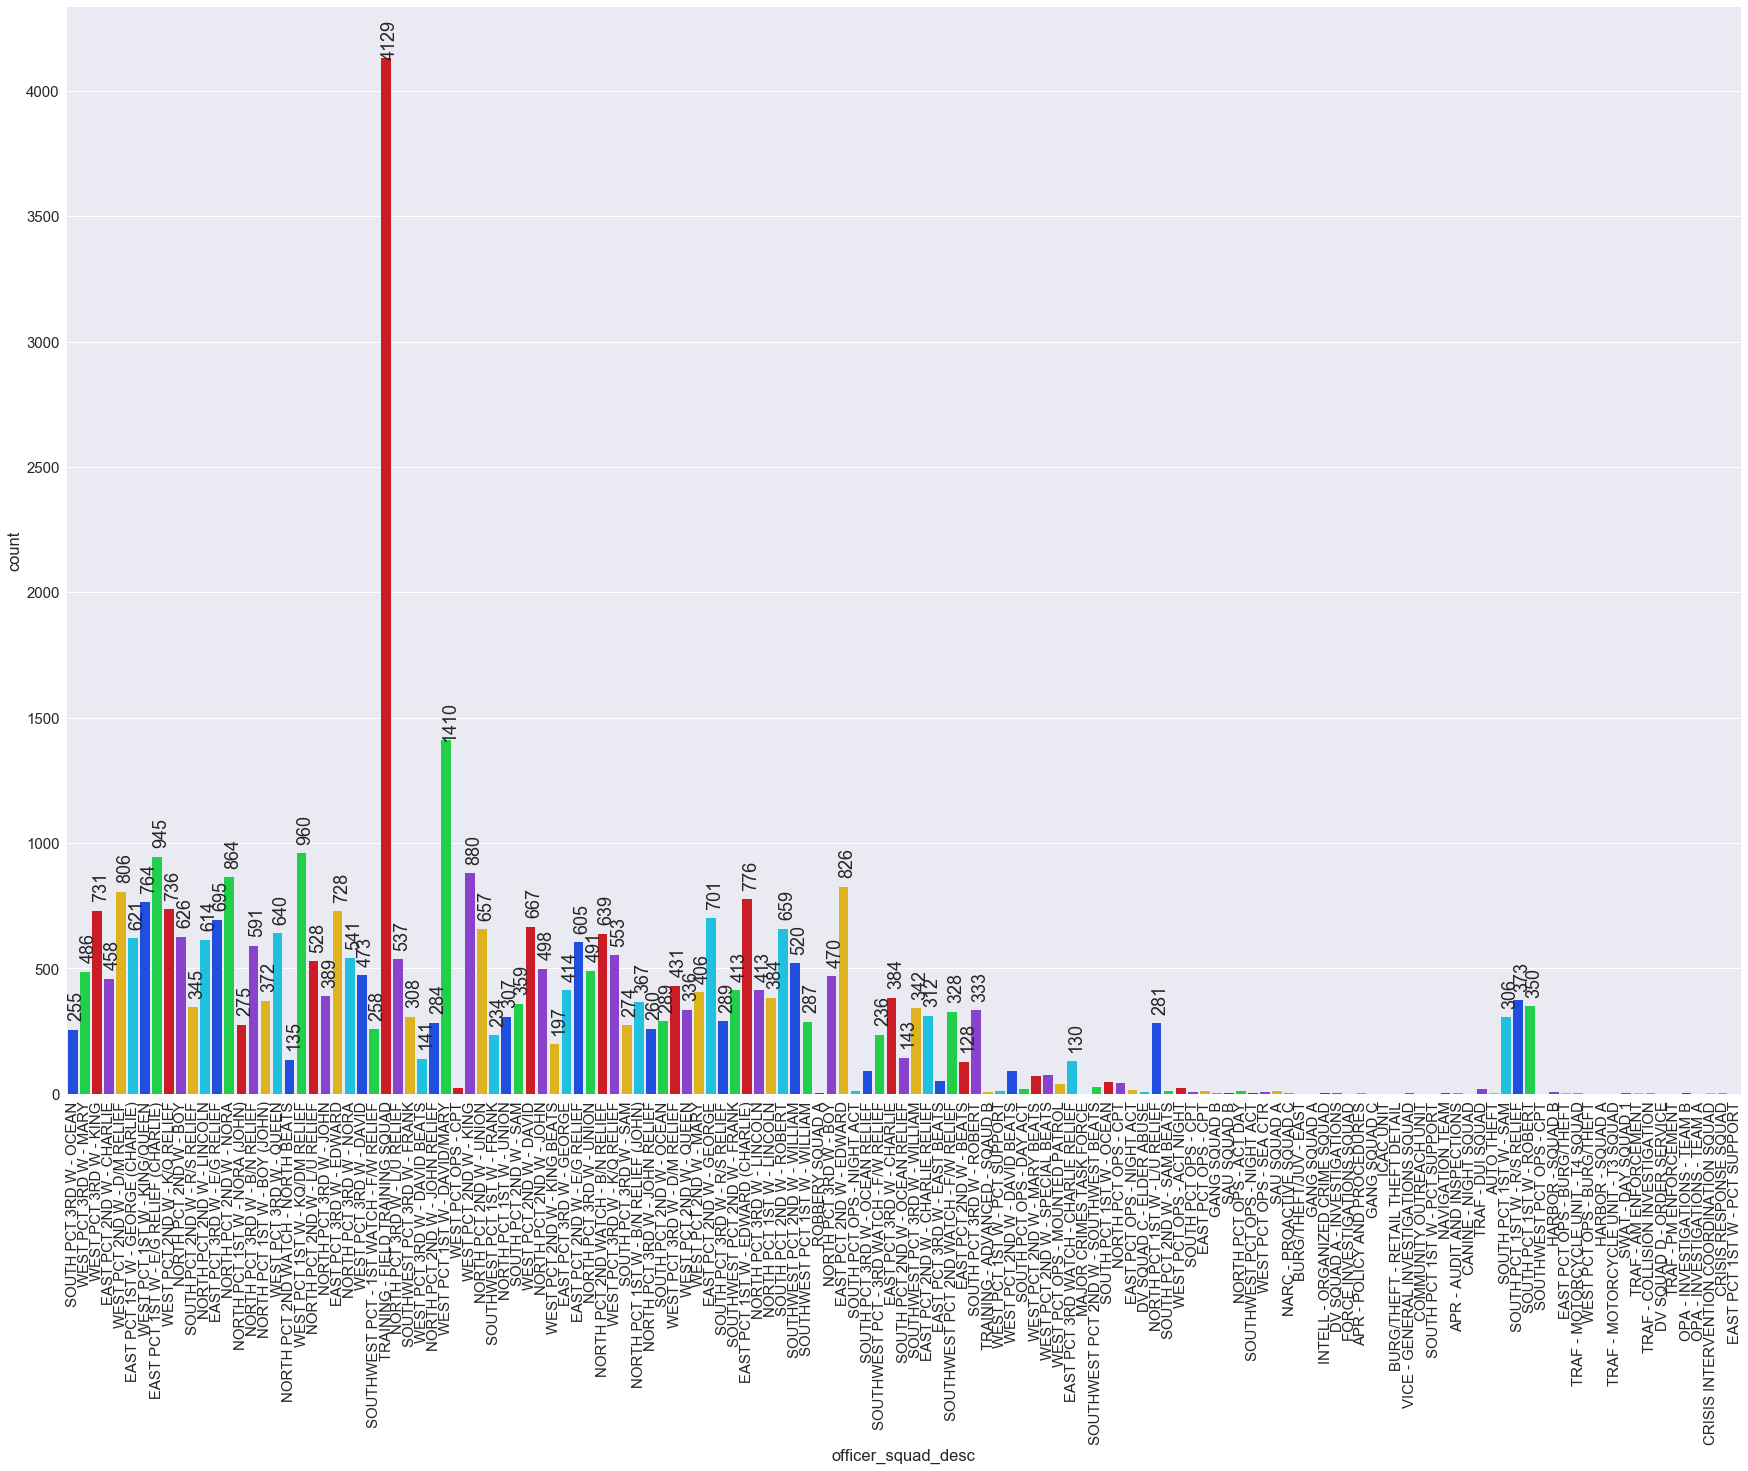

In [10]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,20))
ax = sns.countplot(df.officer_squad_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    if (height > 100):
        ax.text(p.get_x(), height+100, '%.0f'%(height), rotation=90)
plt.show()

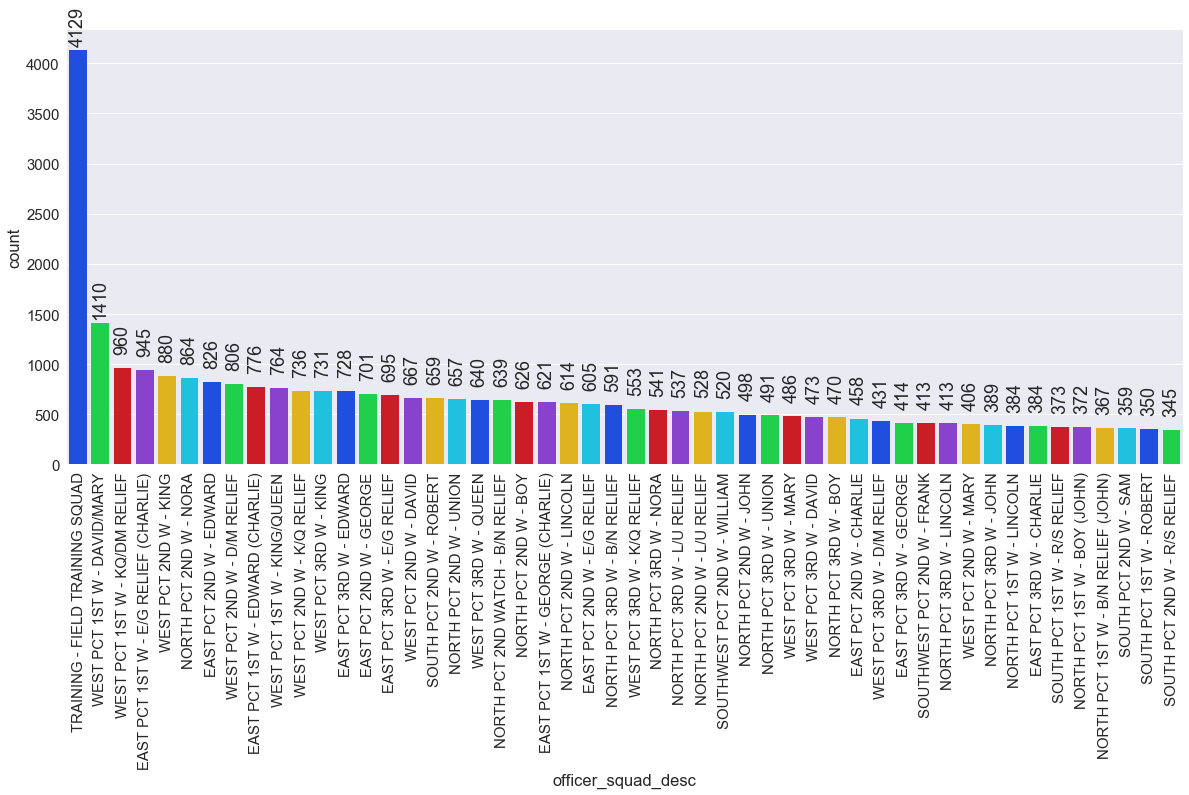

In [11]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.officer_squad_desc, order=df.officer_squad_desc.value_counts().iloc[:50].index, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    if (height > 100):
        ax.text(p.get_x(), height+300, '%.0f'%(height), rotation=90)
plt.show()

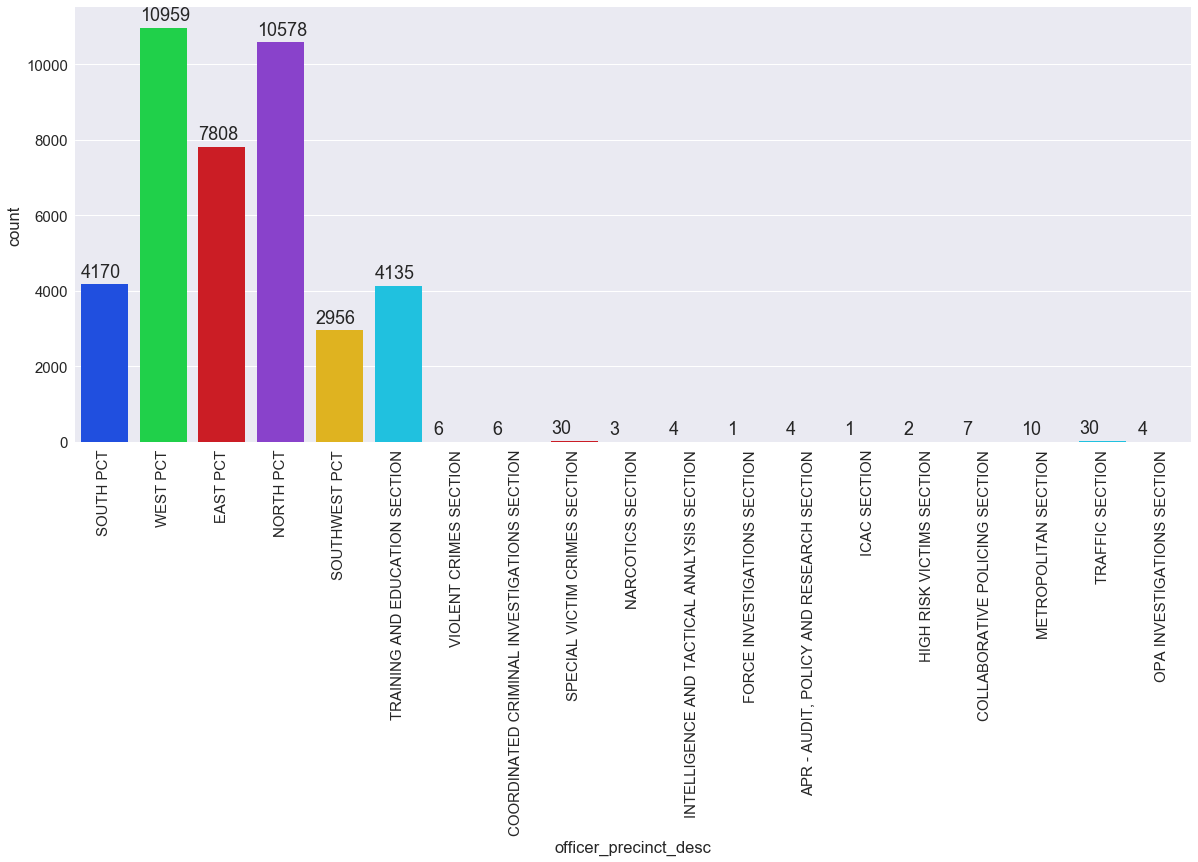

In [12]:
sns.set(font_scale=1.5)
ax = sns.countplot(df.officer_precinct_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+200, '%.0f'%(height), rotation=0)
plt.show()

In [13]:
officer_precinct_squad = df[['officer_precinct_desc','officer_squad_desc']].\
groupby(['officer_precinct_desc','officer_squad_desc']).\
size().\
reset_index()

In [14]:
officer_precinct_squad_gt_100 = officer_precinct_squad[officer_precinct_squad[0] > 10]
grp_list = officer_precinct_squad_gt_100['officer_precinct_desc'].unique()
#print(grp_list)

In [15]:
df_officer_precinct_desc_gt_100 = df[df['officer_precinct_desc'].isin(grp_list)]

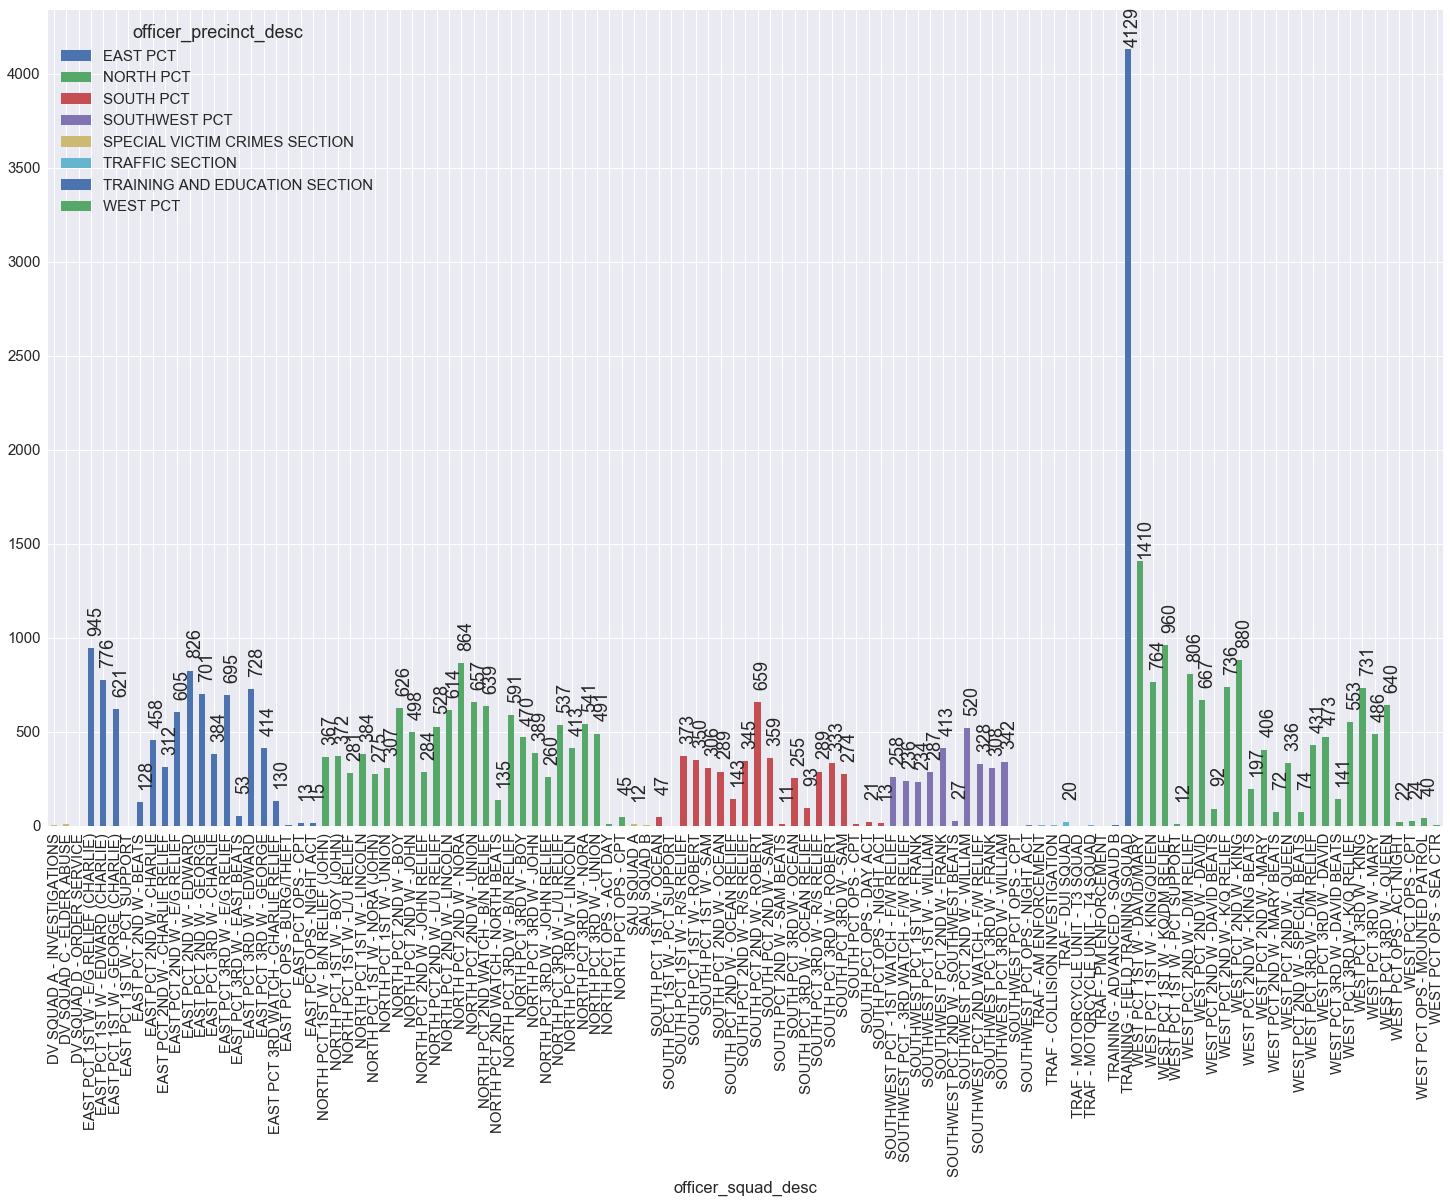

In [16]:
sns.set(font_scale=1.5)

crosstab = pd.crosstab(index=df_officer_precinct_desc_gt_100['officer_squad_desc'],\
                       columns=df_officer_precinct_desc_gt_100['officer_precinct_desc'])
ax = crosstab.plot(kind='bar',figsize=(25,15), stacked=True)

for p in ax.patches:
    height = p.get_height()
    if (height > 10):
        ax.text(p.get_x()-0.05, height+150, '%.0f'%height, rotation=90)
plt.show()

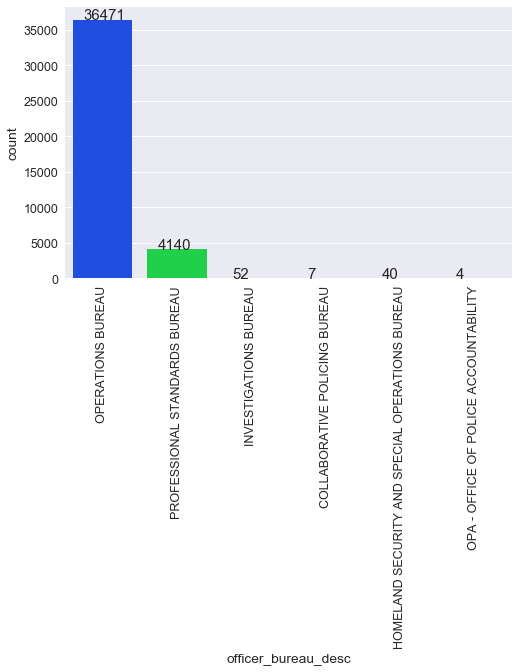

In [17]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.officer_bureau_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.15, height, '%.0f'%(height))
plt.show()

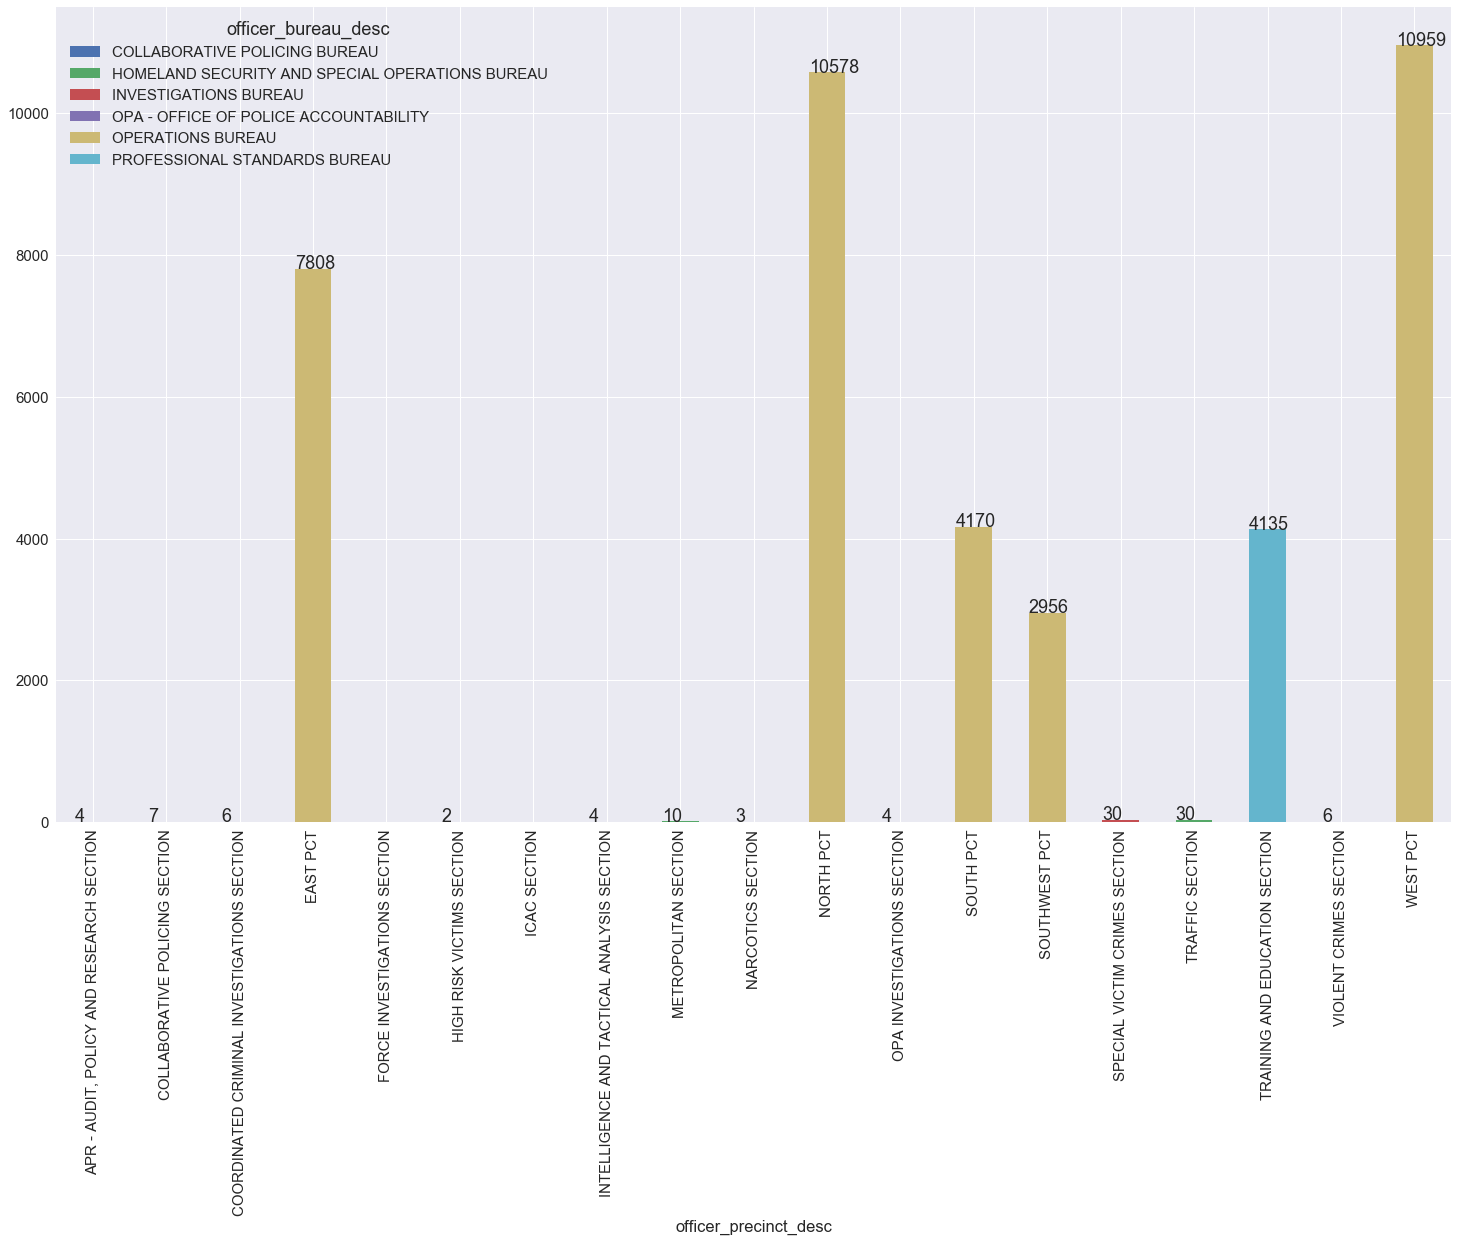

In [18]:
sns.set(font_scale=1.5)
crosstab = pd.crosstab(index=df['officer_precinct_desc'],columns=df['officer_bureau_desc'])
ax = crosstab.plot(kind='bar',figsize=(25,15), stacked=True)
for p in ax.patches:
    height = p.get_height()
    if(height > 1):
        ax.text(p.get_x(), height, '%.0f'%(height))
plt.show()

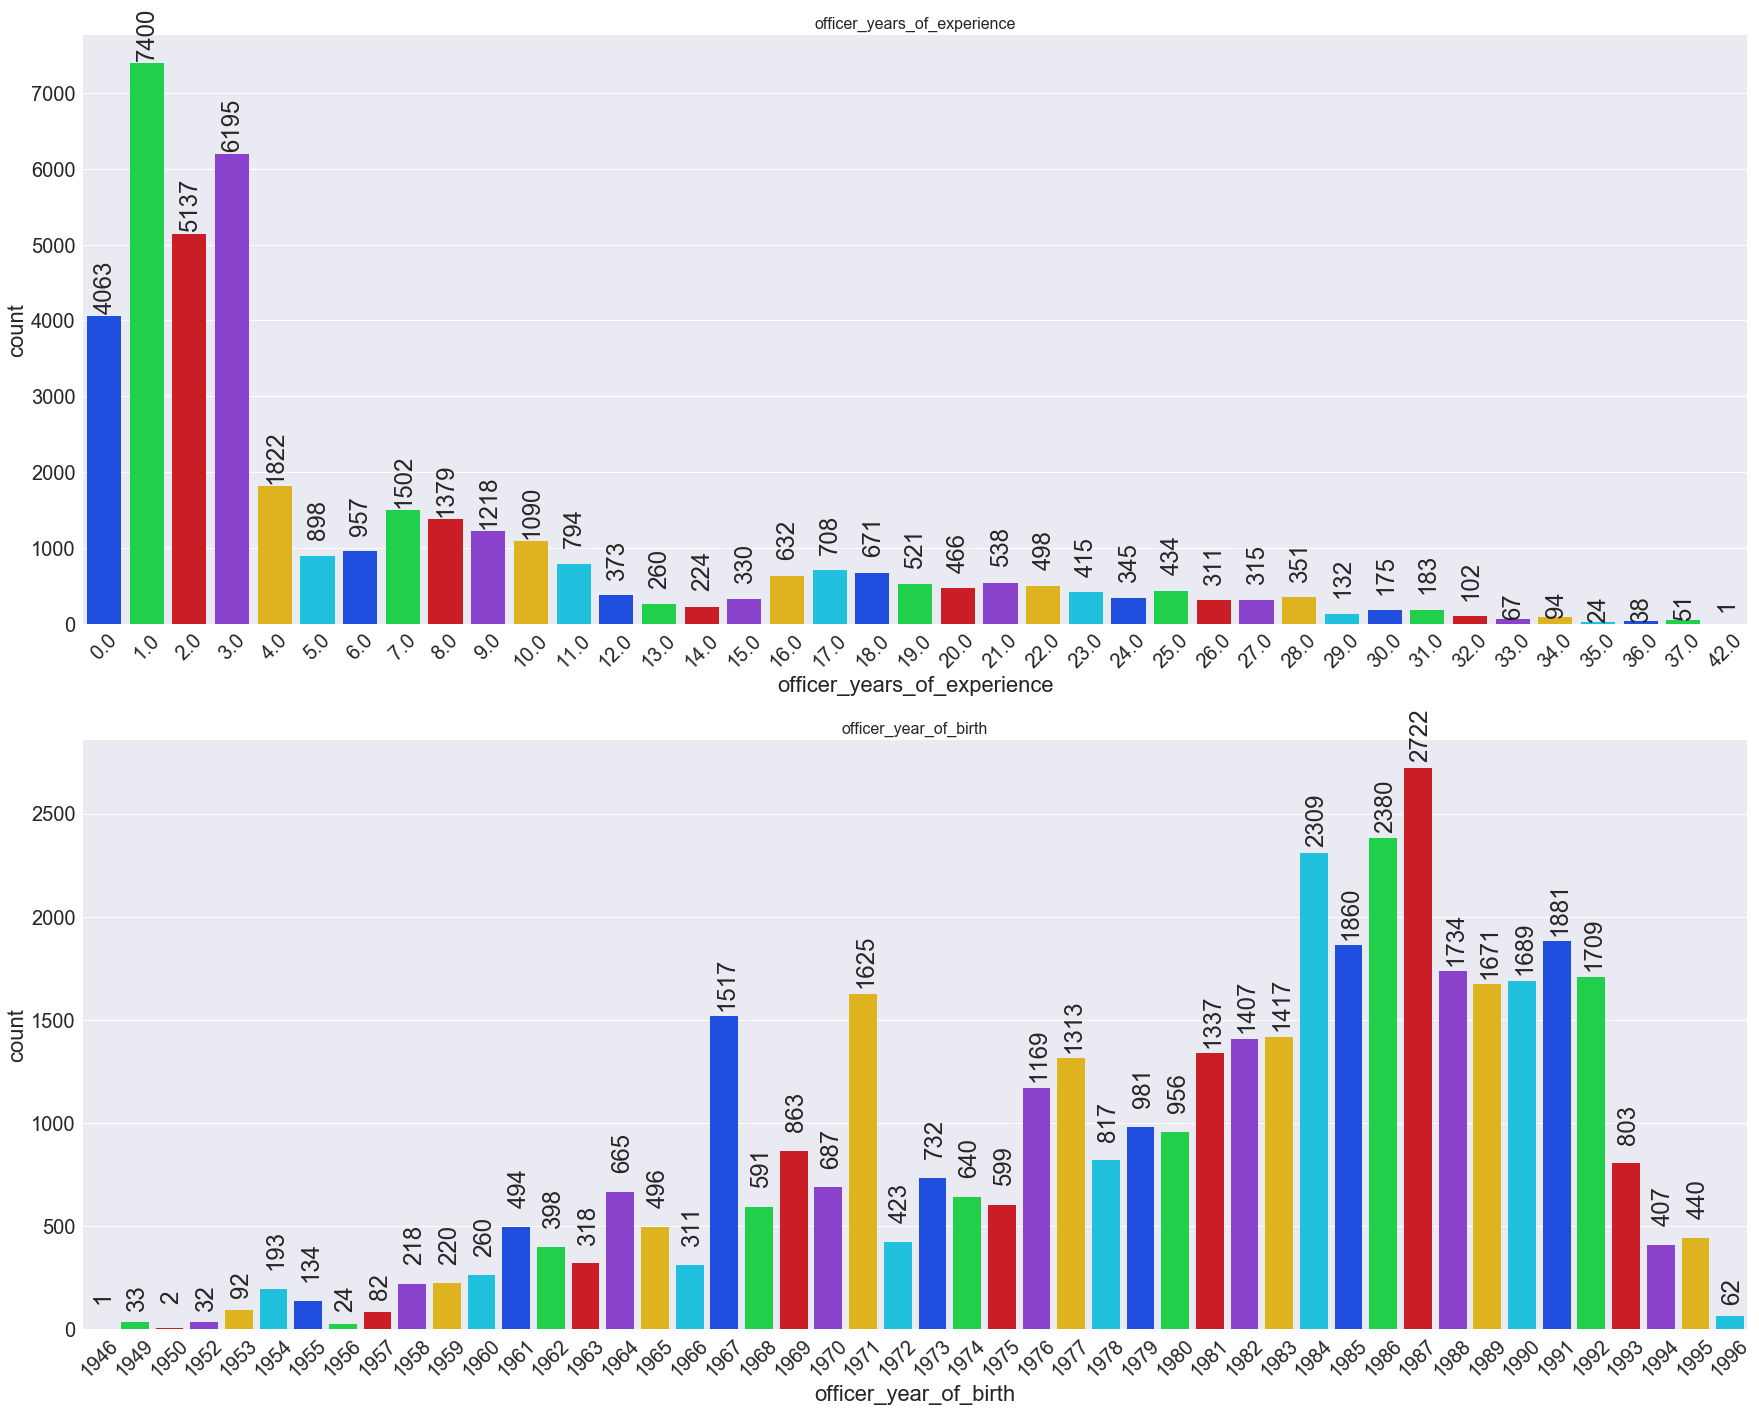

In [19]:
sns.set(font_scale=2.0)

x_colnames = ['officer_years_of_experience','officer_year_of_birth']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(25,20), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], palette="bright")
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=45)
    ax[i].set_title(str(x_colnames[i]) , fontsize=16)
    for p in axes.patches:
        height = p.get_height()
        extraheight = 500 if x_colnames[i] != 'officer_year_of_birth' else 200
        if height > 0 and height < 100 :
            extraheight = 100
        axes.text(p.get_x()+0.15, height+extraheight, '%.0f'%(height), rotation=90)
plt.tight_layout()

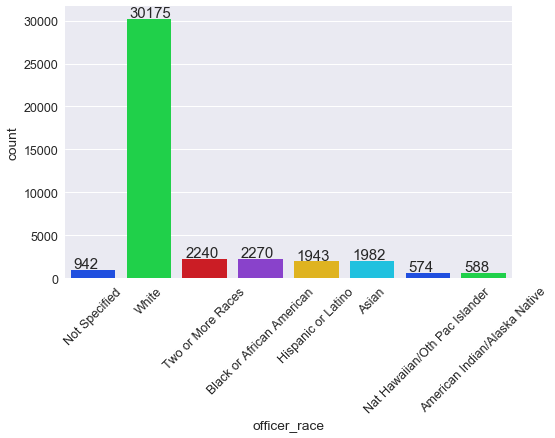

In [20]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.officer_race,palette="bright")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+200, '%.0f'%(height))
plt.show()

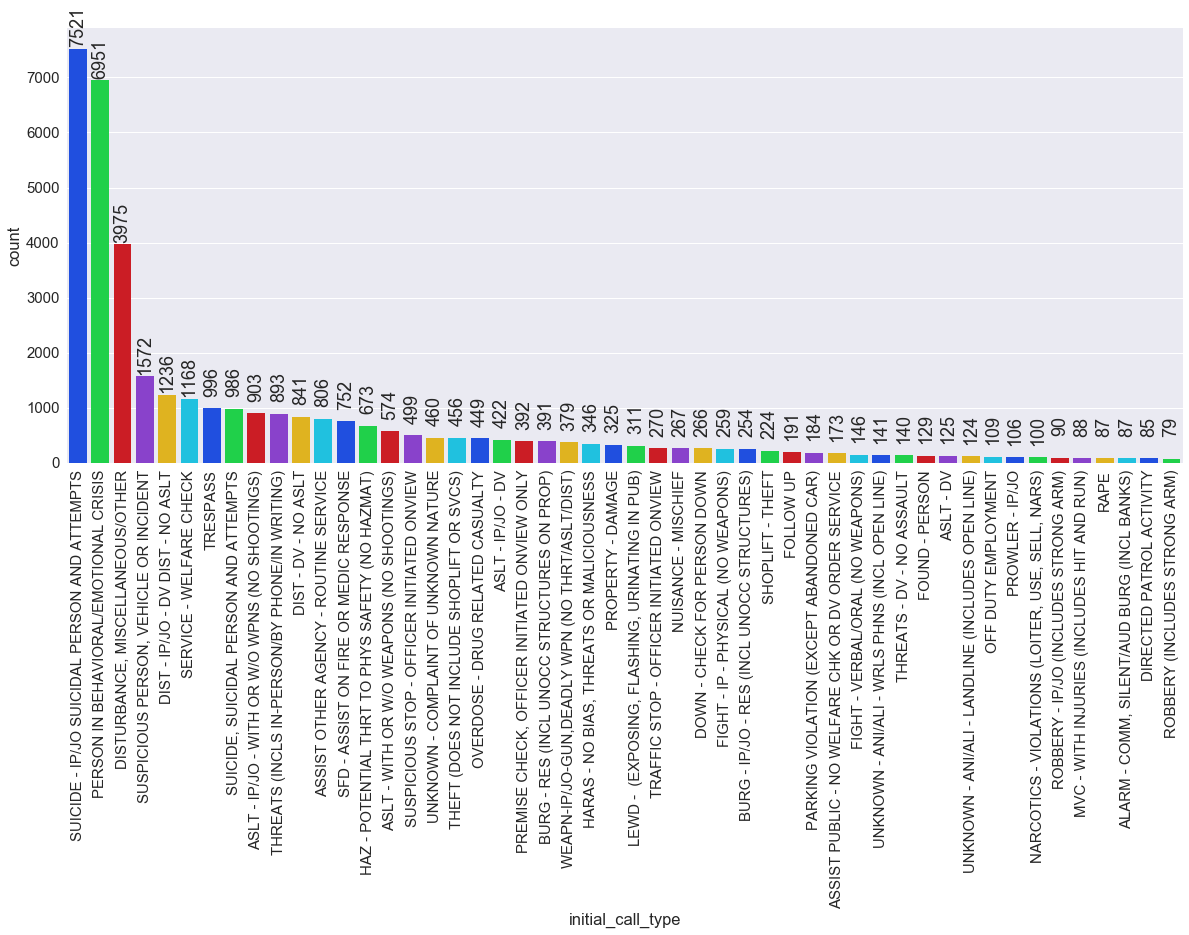

In [21]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.initial_call_type, order=df.initial_call_type.value_counts().iloc[:50].index, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+500, '%.0f'%(height), rotation=90)
plt.show()

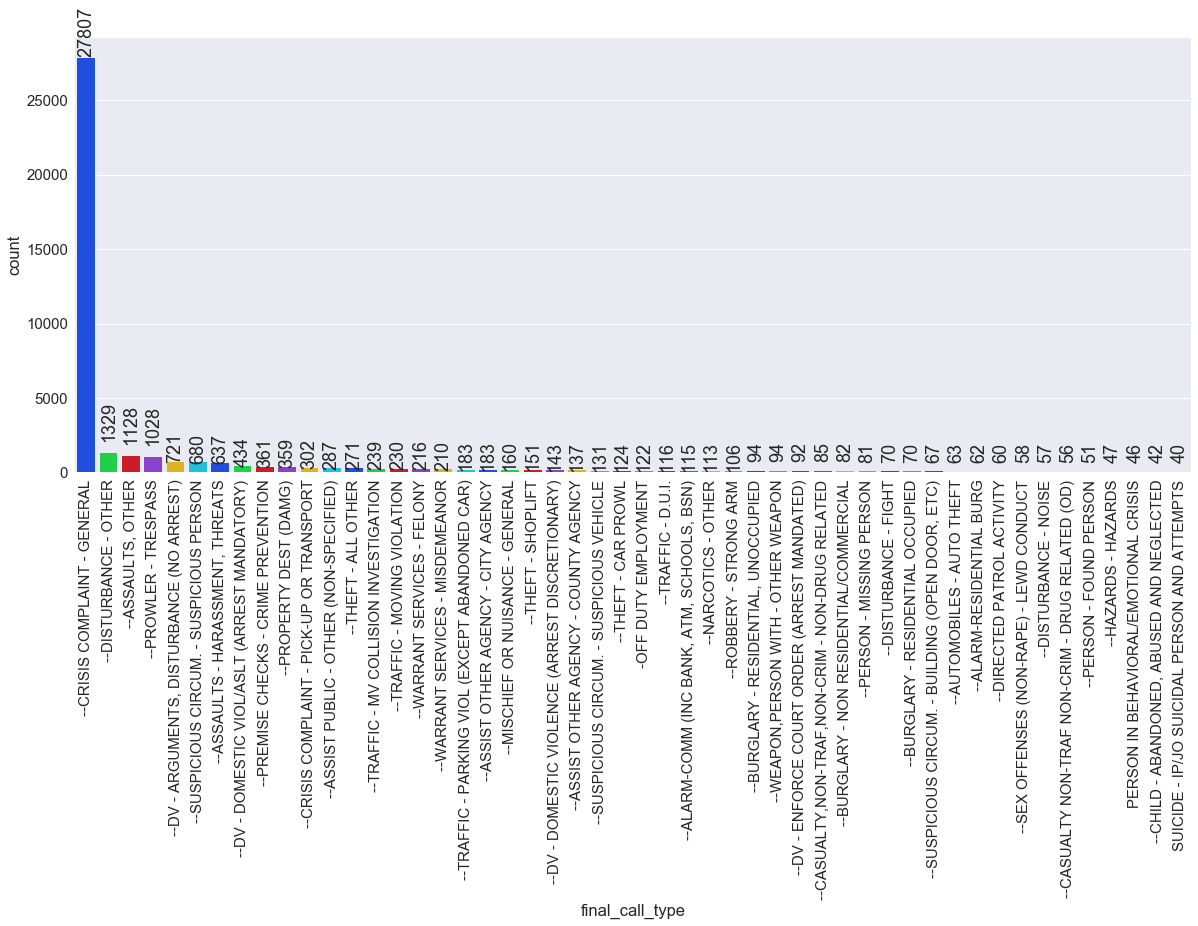

In [22]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
ax = sns.countplot(df.final_call_type, order=df.final_call_type.value_counts().iloc[:50].index, palette="bright")
for p in ax.patches:
    height = p.get_height()
    extraheight = 2500
    if height > 10 and height < 1000:
        extraheight = 1000
    ax.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=90)
plt.xticks(rotation=90)
plt.show()

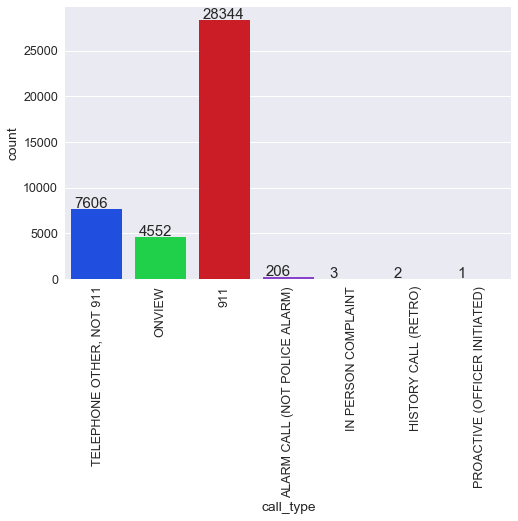

In [23]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(df.call_type, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

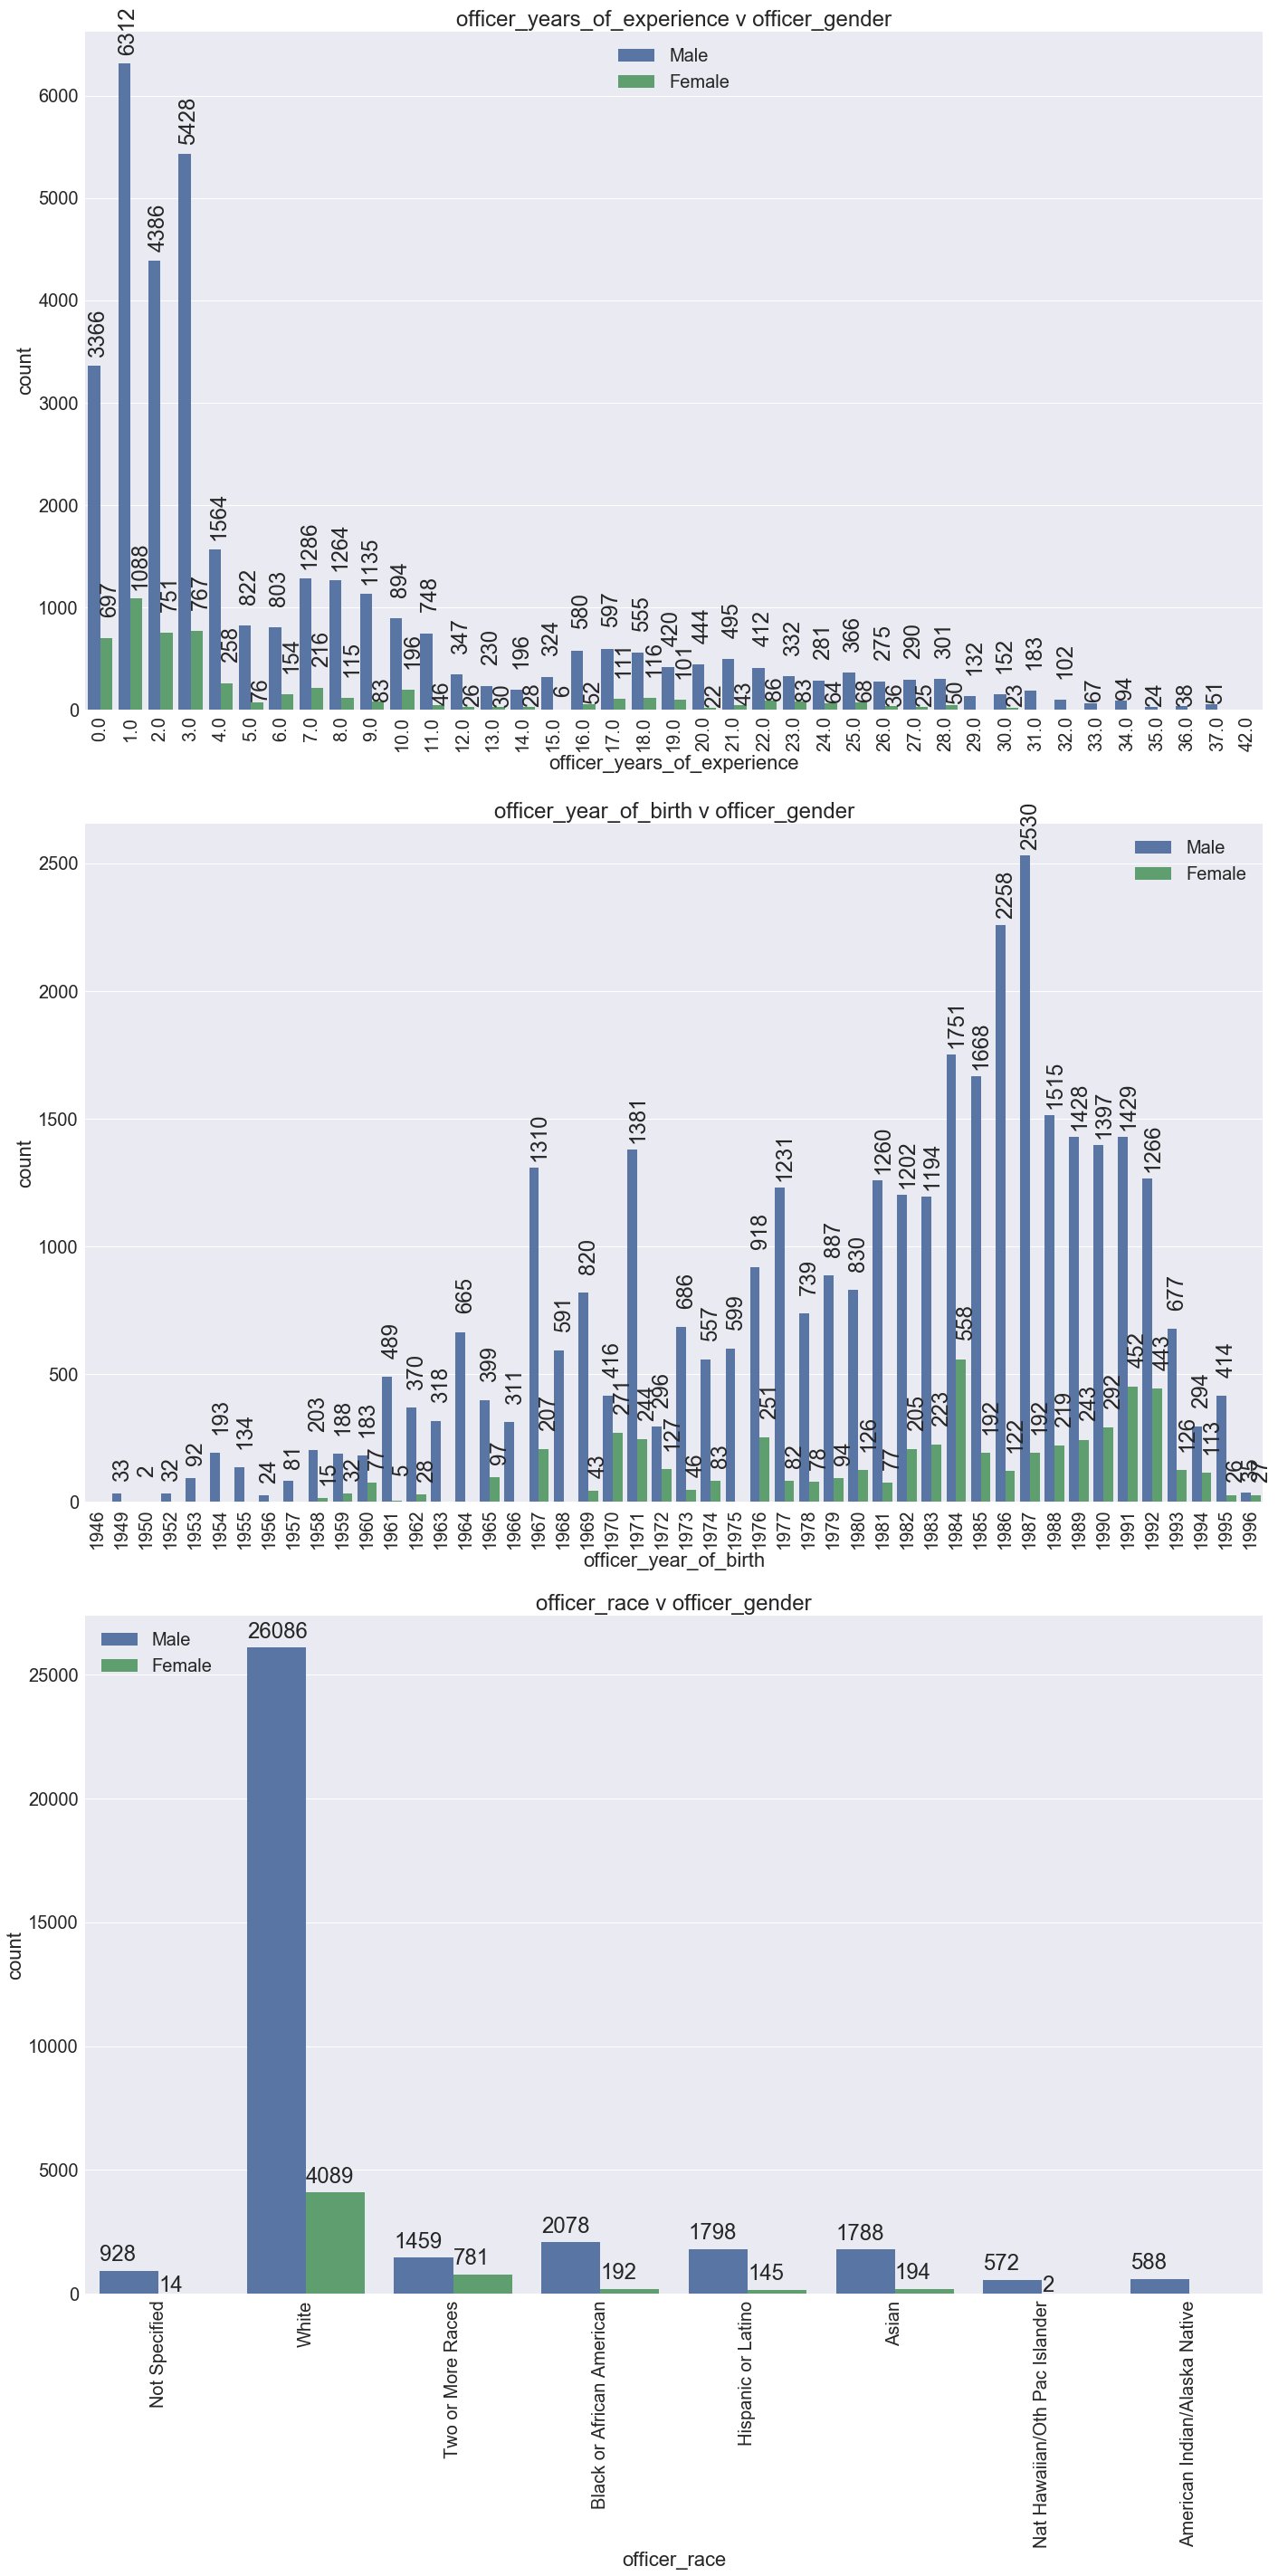

In [24]:
sns.set(font_scale=2.0)
x_colnames = ['officer_years_of_experience','officer_year_of_birth','officer_race']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(20,40), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], hue='officer_gender')
    axes.legend(('Male','Female'))
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) +" v officer_gender", fontsize=24)
    rotation = 90 if x_colnames[i] != 'officer_race' else 0
    for p in axes.patches:
        height = p.get_height()
        if height > 1:
            extraheight = 400 if x_colnames[i] != 'officer_year_of_birth' else 150
            if height <= 100:
                extraheight = 80
            axes.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=rotation)
plt.tight_layout()
plt.show()

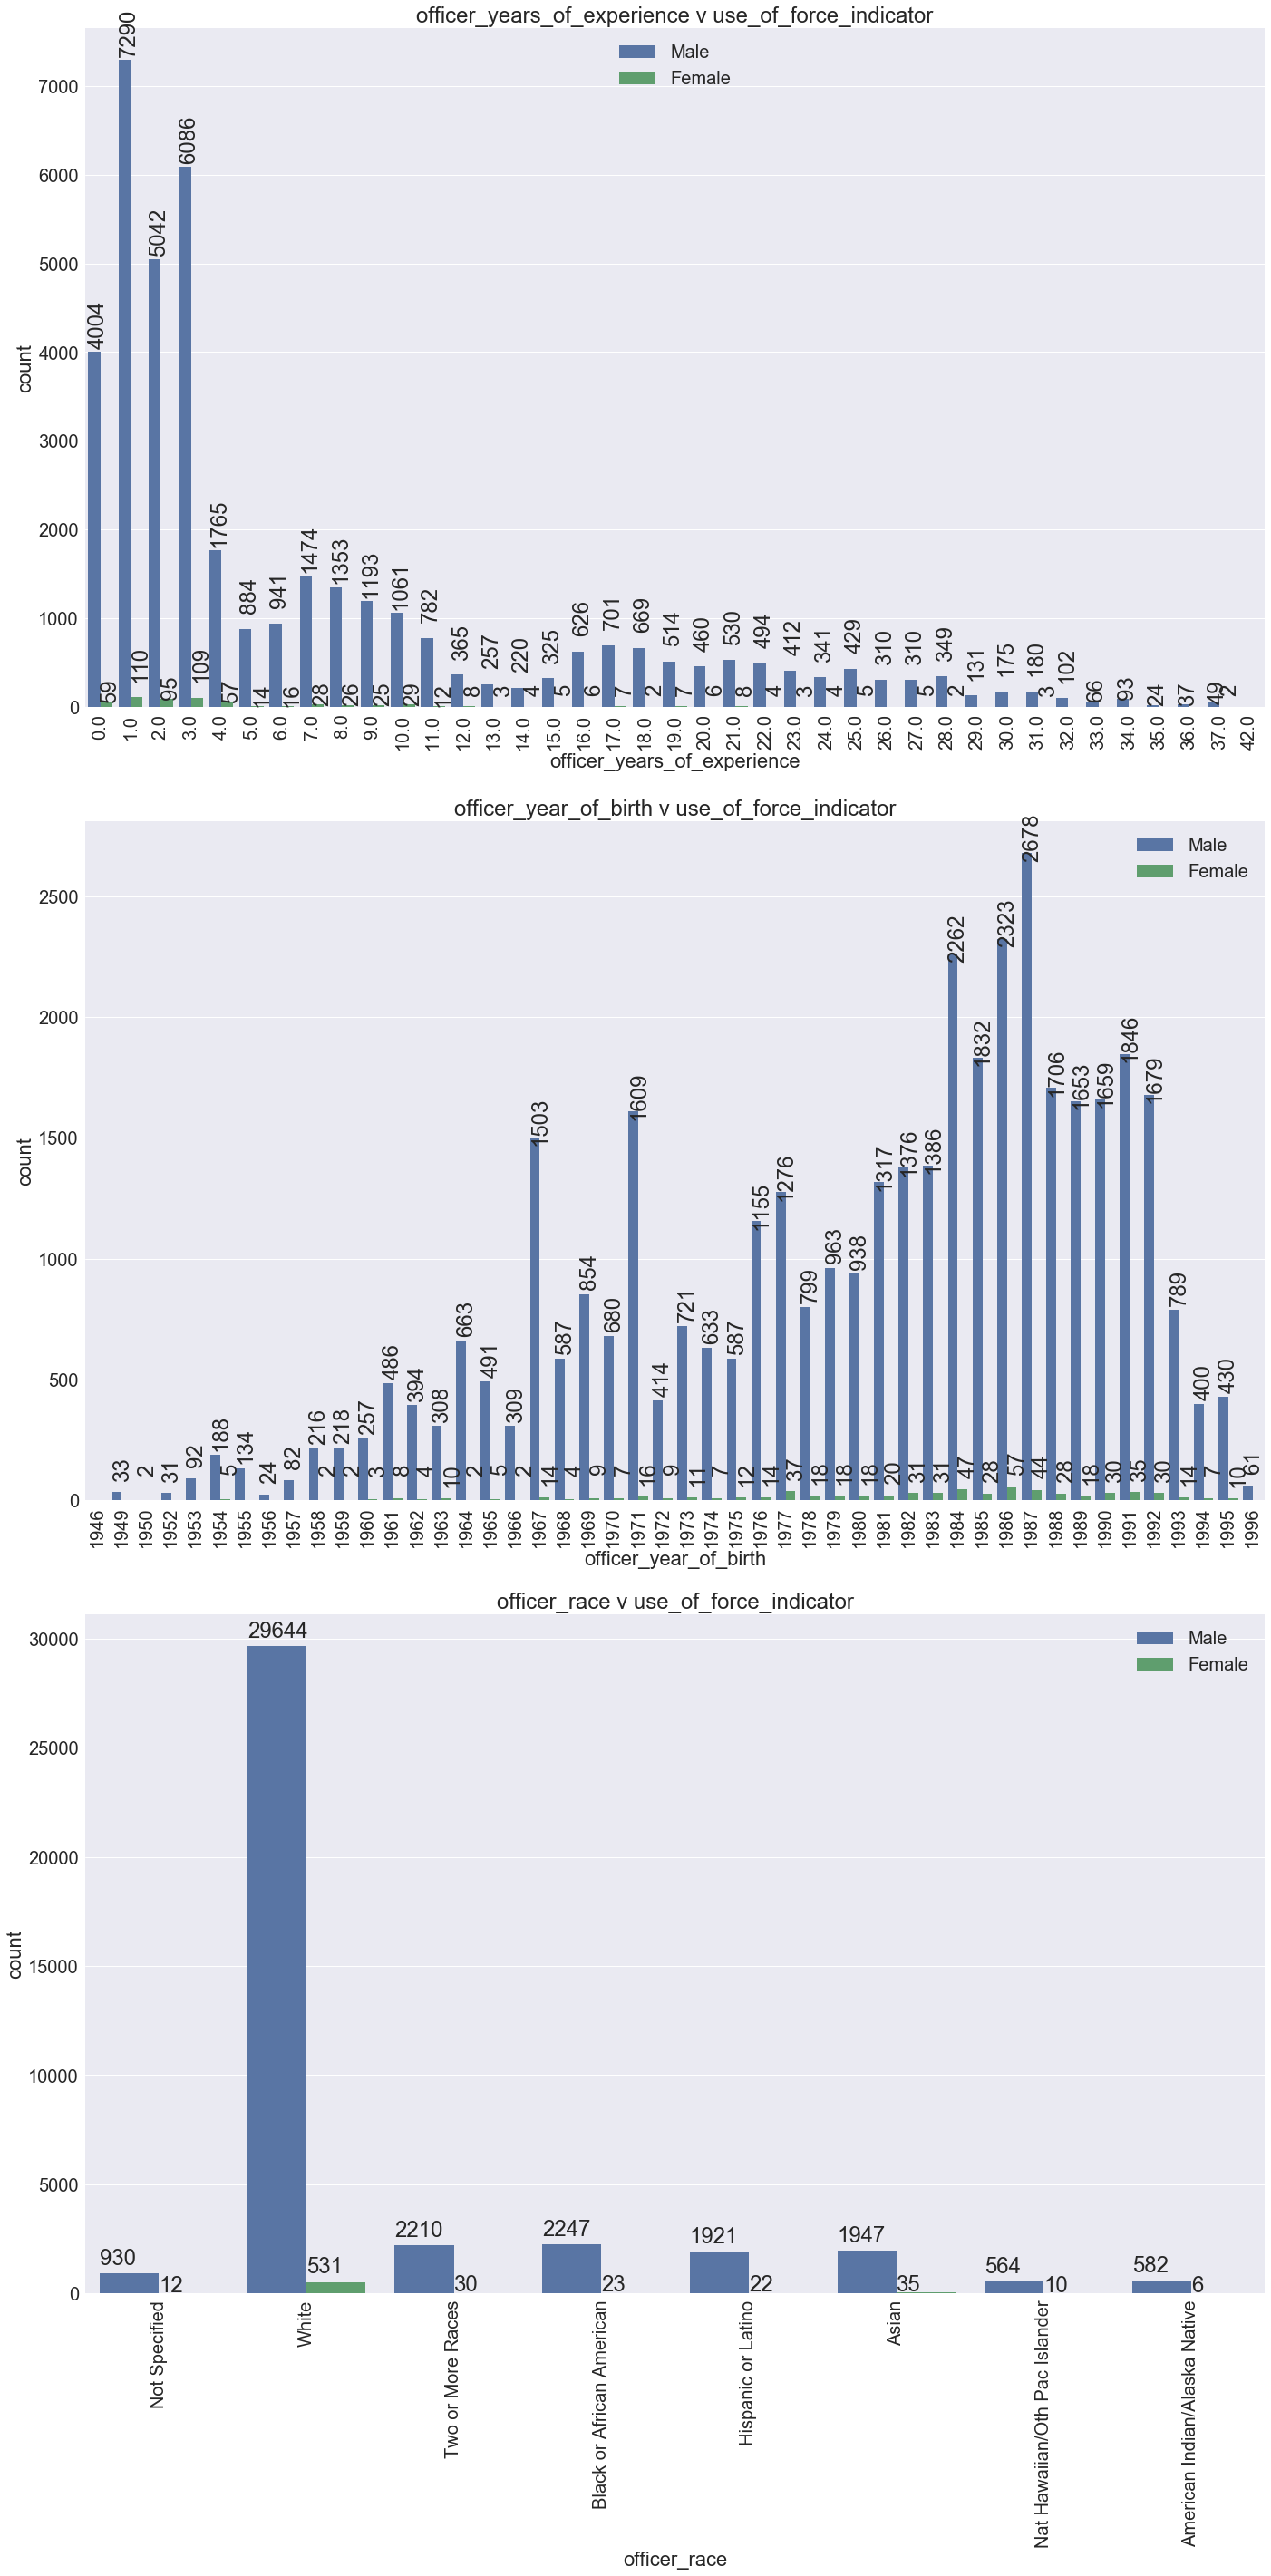

In [25]:
sns.set(font_scale=2.0)
x_colnames = ['officer_years_of_experience','officer_year_of_birth', 'officer_race']

f, ax = plt.subplots(len(x_colnames), 1, figsize=(20,40), sharex=False, sharey=False)
for i in range(len(x_colnames)):
    axes = sns.countplot(x=x_colnames[i], data=df, ax=ax[i], hue='use_of_force_indicator')
    axes.legend(('Male','Female'))
    ax[i].set_xticklabels(axes.get_xticklabels() ,rotation=90)
    ax[i].set_title(str(x_colnames[i]) +" v use_of_force_indicator", fontsize=24)
    rotation = 90 if x_colnames[i] != 'officer_race' else 0
    for p in axes.patches:
        height = p.get_height()
        if height > 1:
            extraheight = 400 if x_colnames[i] != 'officer_year_of_birth' else 100
            if height <= 100:
                extraheight = 80
            axes.text(p.get_x(), height+extraheight, '%.0f'%(height), rotation=rotation)
plt.tight_layout()
plt.show()

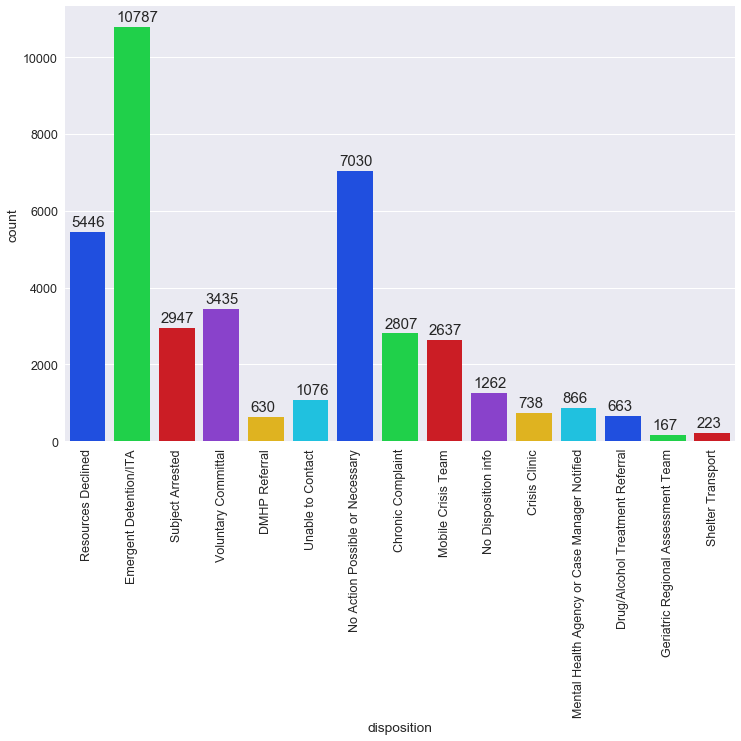

In [26]:
sns.set(font_scale=1.25)
plt.figure(figsize=(12,8))
ax = sns.countplot(df.disposition, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

In [27]:
df_initial_call_type_10 = df[df['initial_call_type'].isin(df.initial_call_type.value_counts().iloc[:10].index)]
df_final_call_type_10 = df[df['final_call_type'].isin(df.final_call_type.value_counts().iloc[:10].index)]

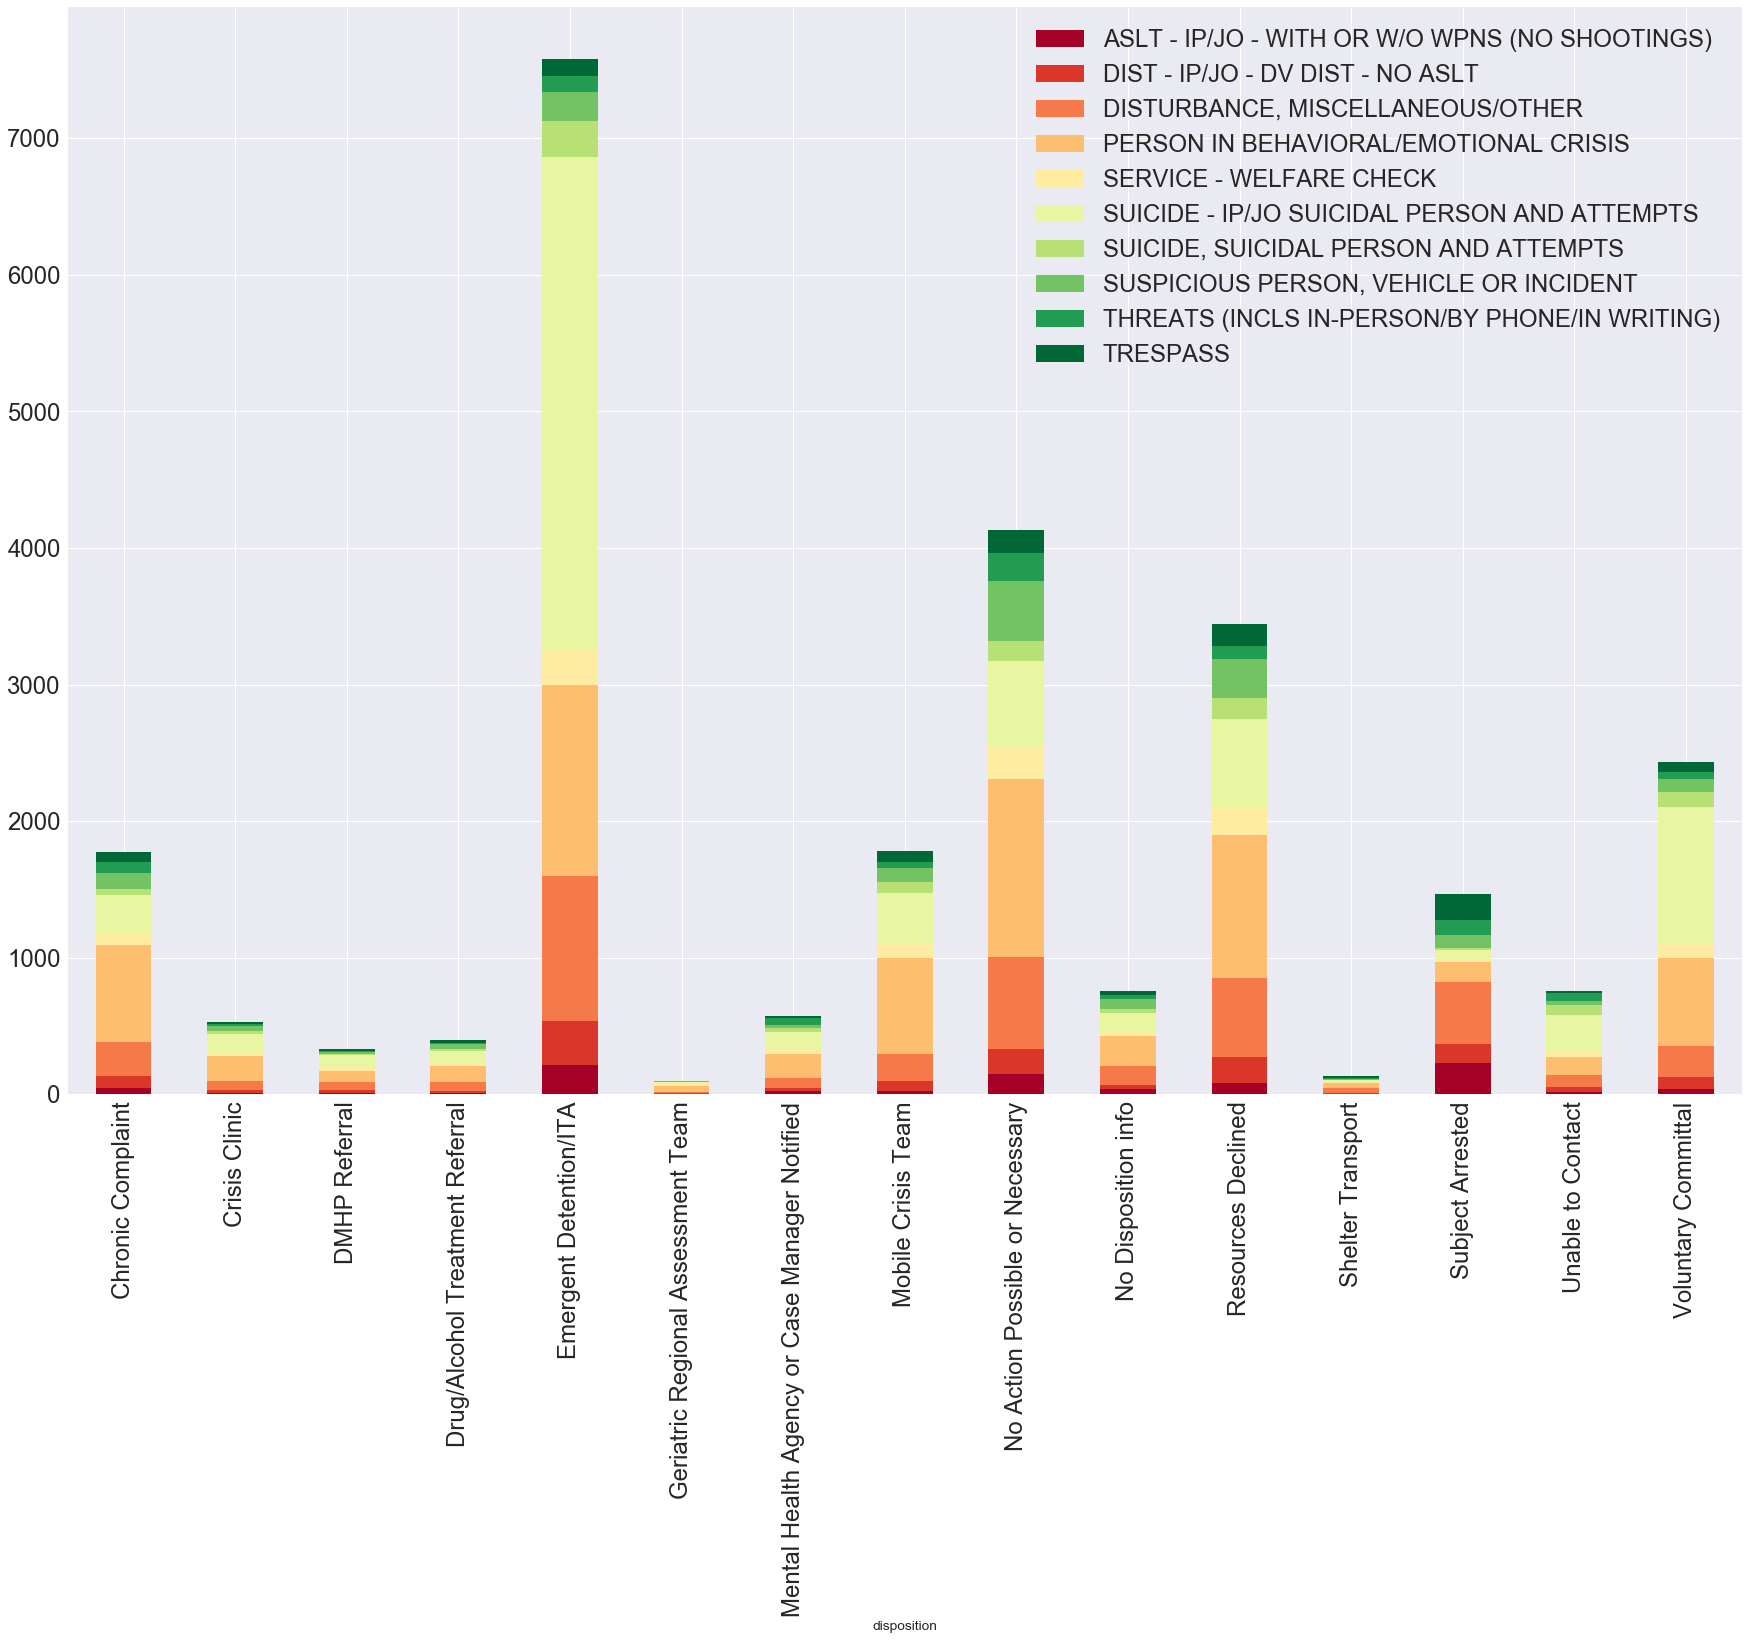

In [28]:
sns.set(font_scale=1.25)
crosstab = pd.crosstab(index=df_initial_call_type_10['disposition'],columns=df_initial_call_type_10['initial_call_type'])
ax = crosstab.plot(kind='bar',figsize=(30,20), stacked=True, fontsize=24, cmap=cmap)
plt.legend(fontsize=24)
plt.show()

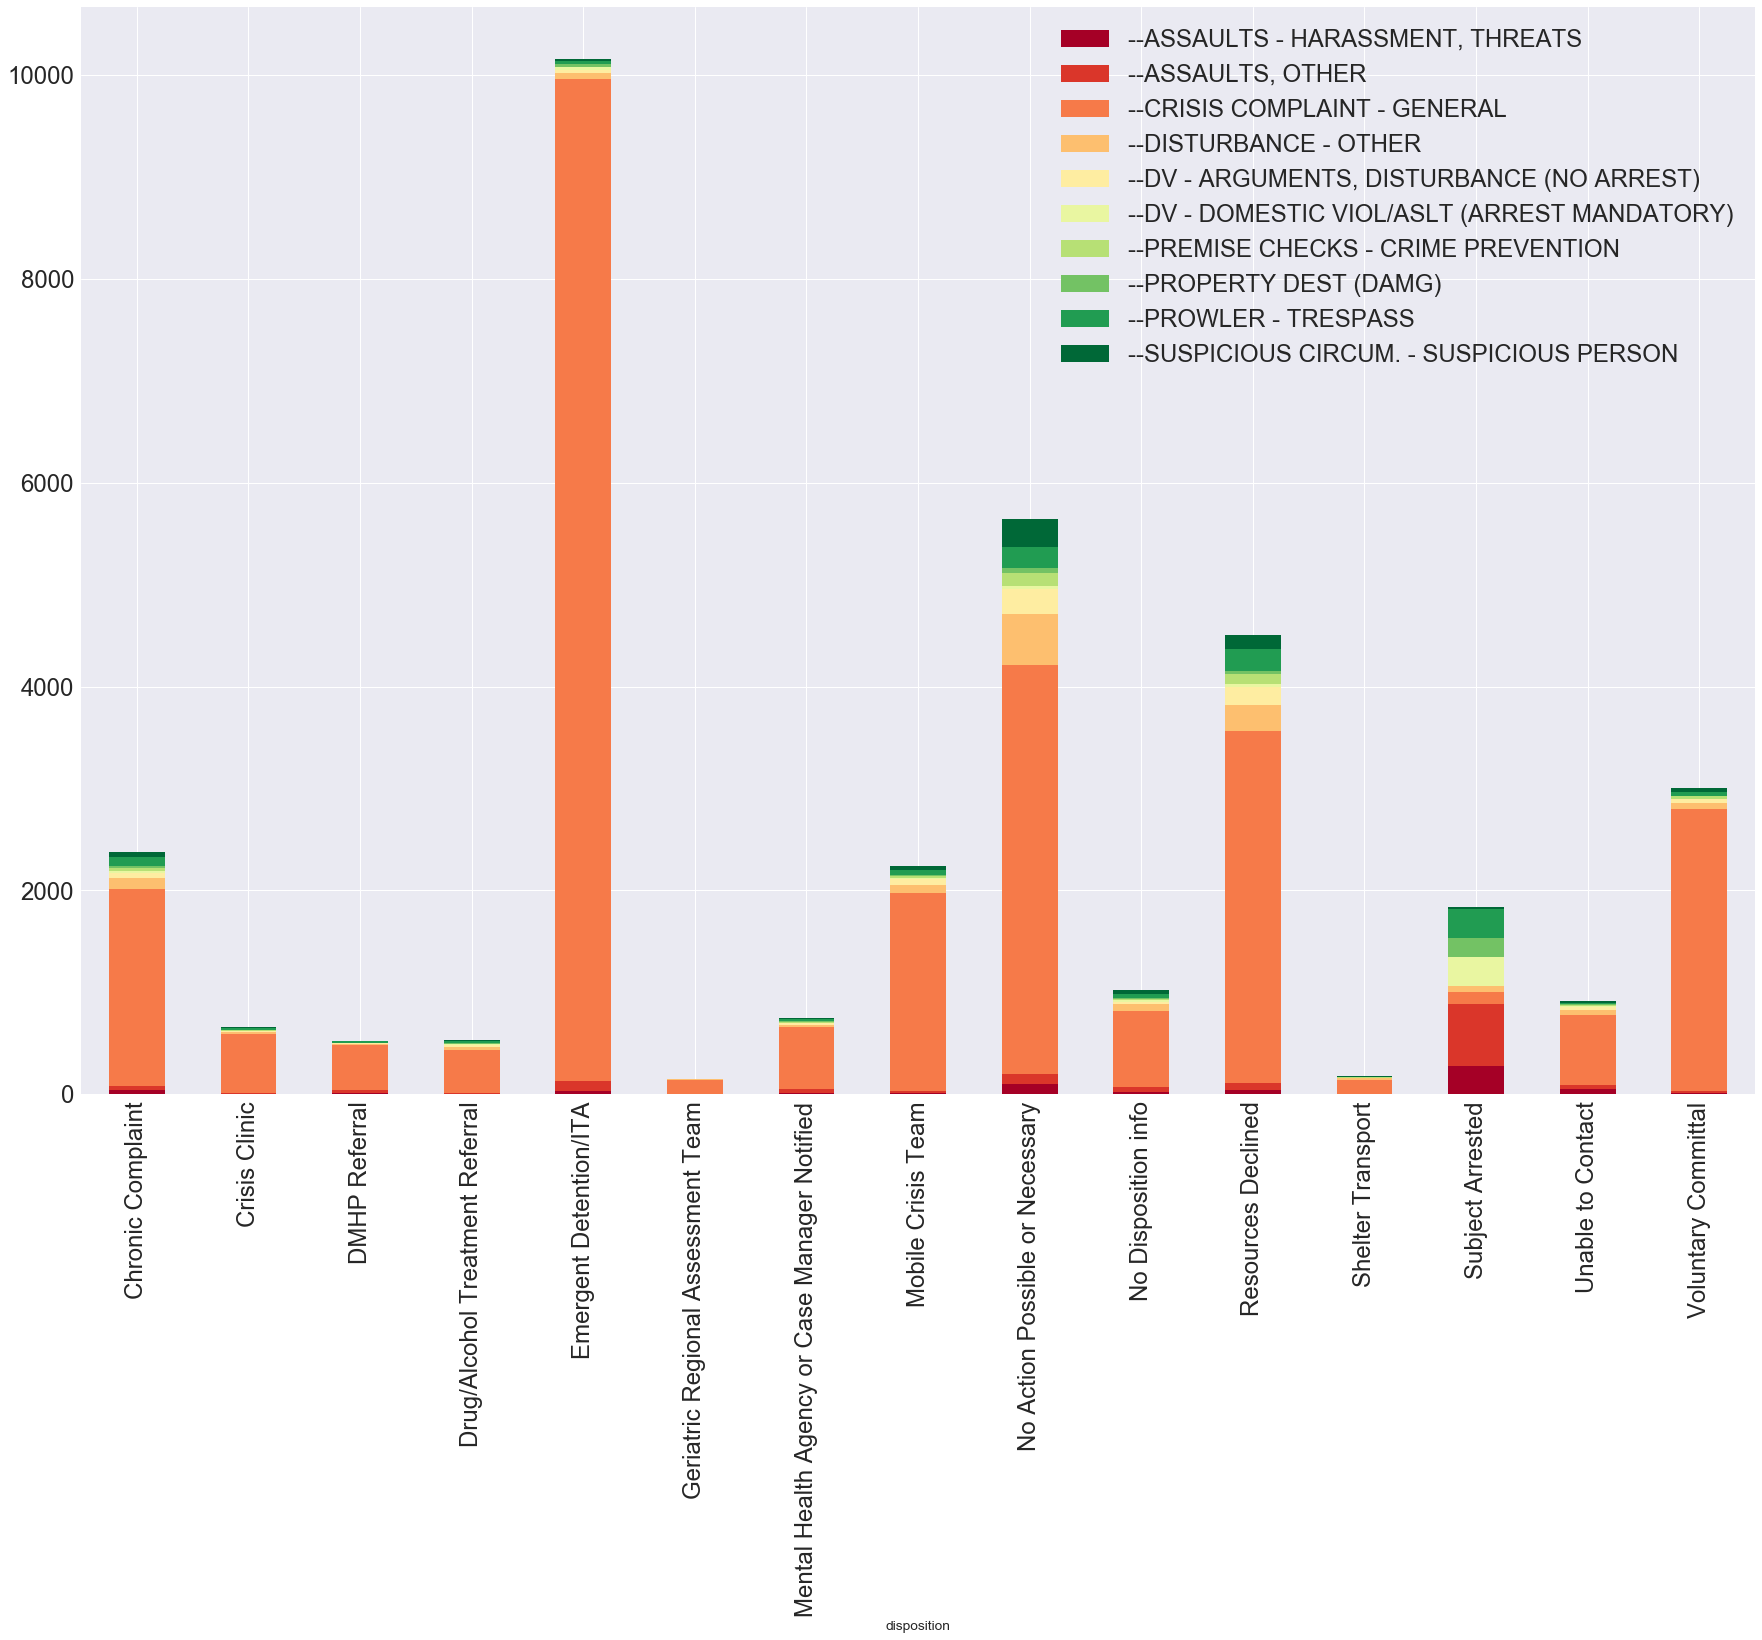

In [29]:
crosstab = pd.crosstab(index=df_final_call_type_10['disposition'],columns=df_final_call_type_10['final_call_type'])
ax = crosstab.plot(kind='bar',figsize=(30,20), stacked=True, fontsize=24, cmap=cmap)
plt.legend(fontsize=24)
plt.show()

In [30]:
print("Number of officers:",df.officer_id.nunique())

Number of officers: 952


In [31]:
df['officer_years_of_experience_mean'] = df.groupby(['officer_id'])['officer_years_of_experience'].transform('mean')

In [32]:
officer_id_reported_ge100 = df.groupby(['officer_id']).filter(lambda x : x['officer_id'].count() > 100)

In [33]:
officer_id_reported_ge100.officer_id.nunique()

69

In [34]:
pd.set_option('display.max_columns', None) 

In [35]:
officer_id_reported_ge100.describe(include='all')

beat call_type cit_certified_indicator cit_officer_arrived  \
count   10103     10103                   10103               10103   
unique     51         5                       2                   2   
top        K2       911                       Y                   Y   
freq      547      6861                    5722                8766   
first     NaN       NaN                     NaN                 NaN   
last      NaN       NaN                     NaN                 NaN   
mean      NaN       NaN                     NaN                 NaN   
std       NaN       NaN                     NaN                 NaN   
min       NaN       NaN                     NaN                 NaN   
25%       NaN       NaN                     NaN                 NaN   
50%       NaN       NaN                     NaN                 NaN   
75%       NaN       NaN                     NaN                 NaN   
max       NaN       NaN                     NaN                 NaN   

       cit_officer_dispatched cit_officer_requested             disposition  \
count                   10103                 10103                   10103   
unique                      2                     2                      15   
top                         N                     N  Emergent Detention/ITA   
freq                     5366                  9042                    2206   
first                     NaN                   NaN                     NaN   
last                      NaN                   NaN                     NaN   
mean                      NaN                   NaN                     NaN   
std                       NaN                   NaN                     NaN   
min                       NaN                   NaN                     NaN   
25%                       NaN                   NaN                     NaN   
50%                       NaN                   NaN                     NaN   
75%                       NaN                   NaN                     NaN   
max                       NaN                   NaN                     NaN   

                     final_call_type                      initial_call_type  \
count                          10103                                  10103   
unique                           136                                    147   
top     --CRISIS COMPLAINT - GENERAL  PERSON IN BEHAVIORAL/EMOTIONAL CRISIS   
freq                            6639                                   1741   
first                            NaN                                    NaN   
last                             NaN                                    NaN   
mean                             NaN                                    NaN   
std                              NaN                                    NaN   
min                              NaN                                    NaN   
25%                              NaN                                    NaN   
50%                              NaN                                    NaN   
75%                              NaN                                    NaN   
max                              NaN                                    NaN   

          occured_date_time officer_bureau_desc officer_gender    officer_id  \
count                 10103               10103          10103  10103.000000   
unique                 7817                   3              2           NaN   
top     2016-08-01 05:55:09   OPERATIONS BUREAU              M           NaN   
freq                      6                9717           8886           NaN   
first   2012-09-26 23:58:16                 NaN            NaN           NaN   
last    2018-10-23 17:30:53                 NaN            NaN           NaN   
mean                    NaN                 NaN            NaN   1645.002672   
std                     NaN                 NaN            NaN    500.899445   
min                     NaN                 NaN            NaN    115.000000   


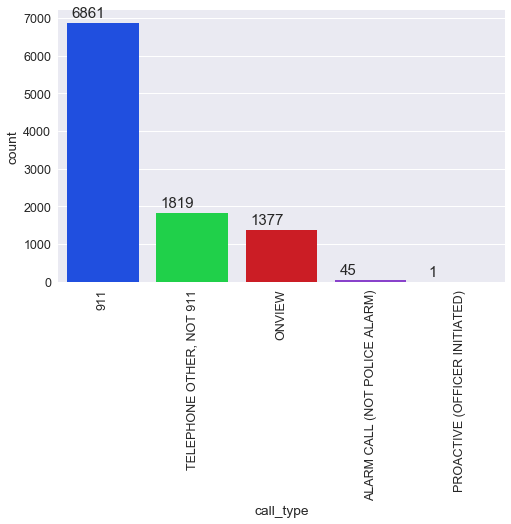

In [36]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(officer_id_reported_ge100.call_type, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

In [37]:
officer_id_reported_ge100_final_call_type_10 = officer_id_reported_ge100[officer_id_reported_ge100['final_call_type']\
                                                                         .isin(officer_id_reported_ge100.final_call_type\
                                                                               .value_counts().iloc[:10].index)]

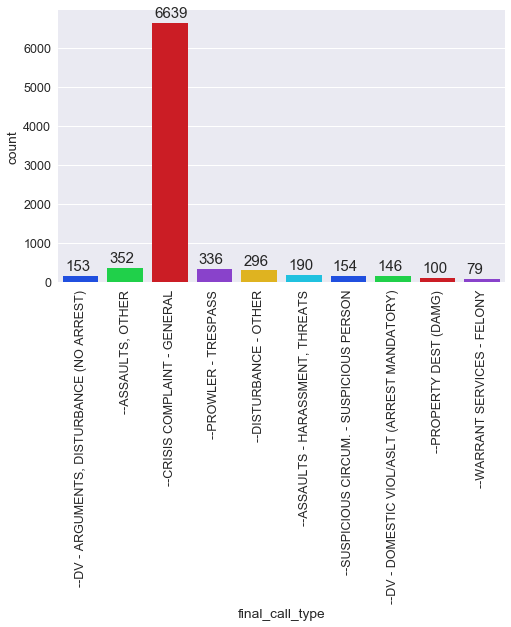

In [38]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(officer_id_reported_ge100_final_call_type_10.final_call_type, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+150, '%.0f'%(height))
plt.show()

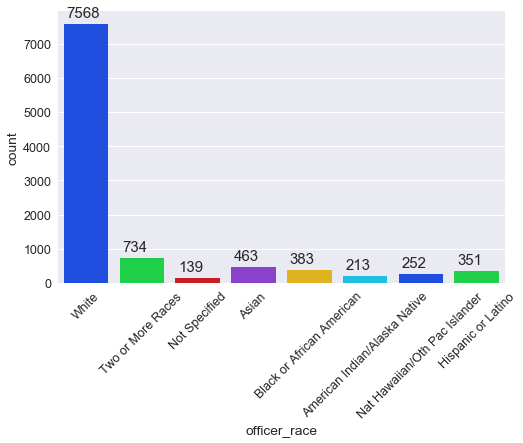

In [39]:
sns.set(font_scale=1.25)
plt.figure(figsize=(8,5))
ax = sns.countplot(officer_id_reported_ge100.officer_race,palette="bright")
plt.xticks(rotation=45)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.05, height+200, '%.0f'%(height))
plt.show()

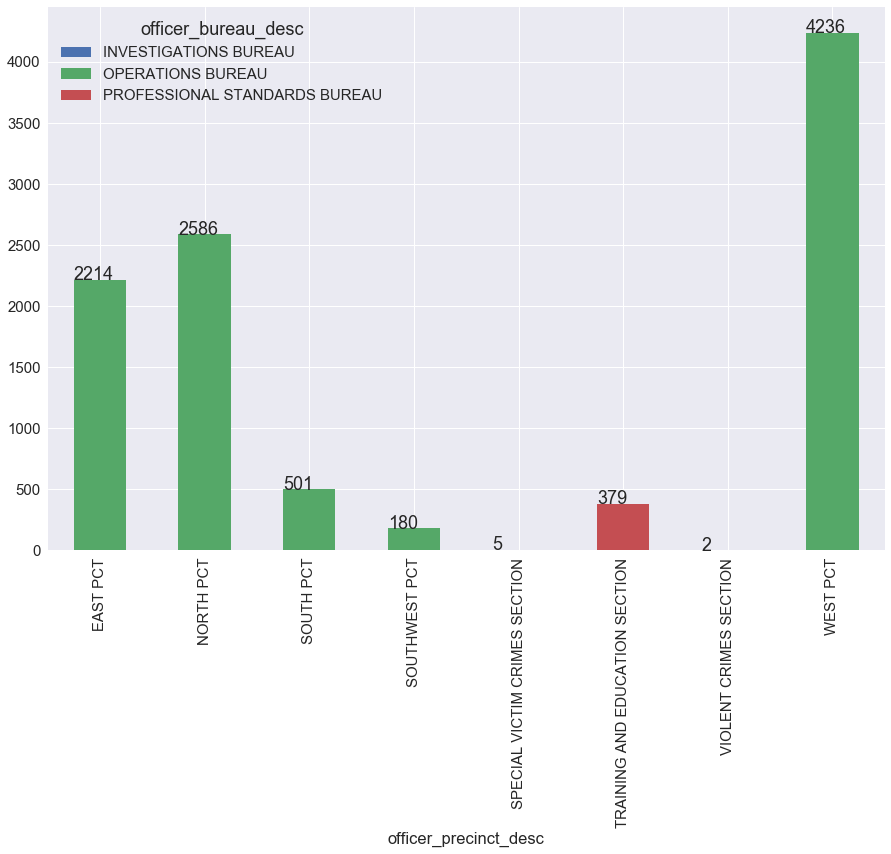

In [40]:
sns.set(font_scale=1.5)
crosstab = pd.crosstab(index=officer_id_reported_ge100['officer_precinct_desc'],\
                       columns=officer_id_reported_ge100['officer_bureau_desc'])
ax = crosstab.plot(kind='bar',figsize=(15,10), stacked=True)
for p in ax.patches:
    height = p.get_height()
    if(height > 1):
        ax.text(p.get_x(), height, '%.0f'%(height))
plt.show()

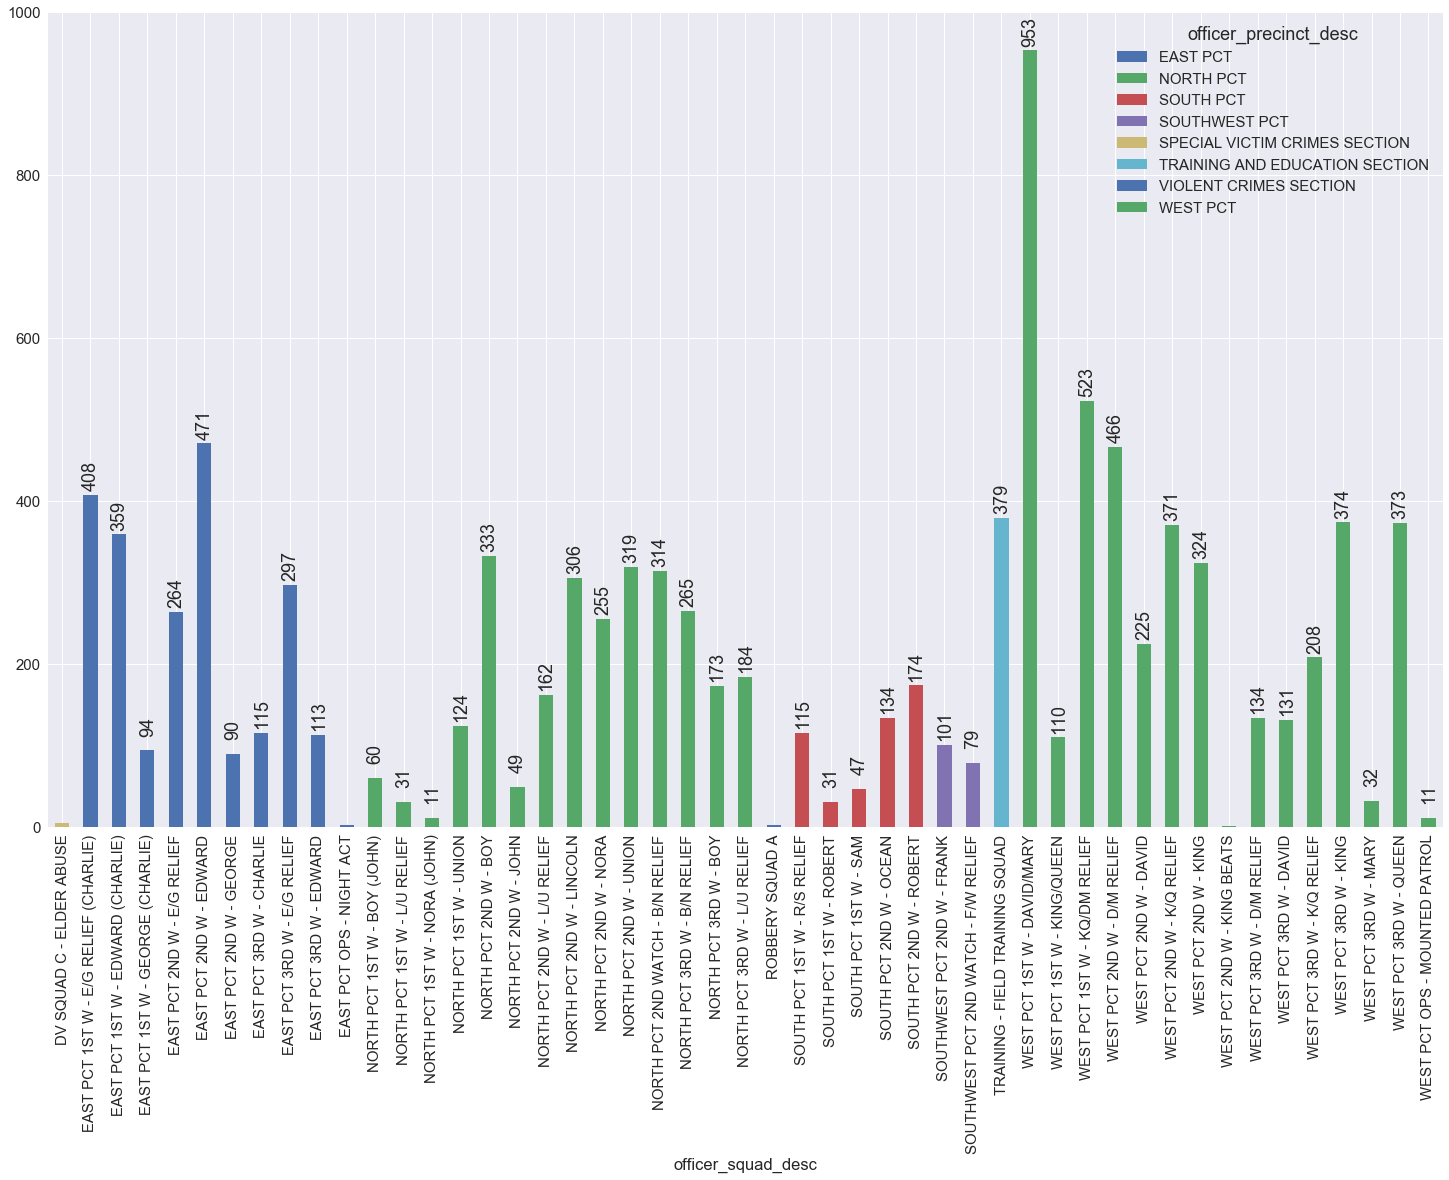

In [41]:
sns.set(font_scale=1.5)

crosstab = pd.crosstab(index=officer_id_reported_ge100['officer_squad_desc'],\
                       columns=officer_id_reported_ge100['officer_precinct_desc'])
ax = crosstab.plot(kind='bar',figsize=(25,15), stacked=True)

for p in ax.patches:
    height = p.get_height()
    if (height > 10):
        ax.text(p.get_x()-0.05, height+25, '%.0f'%height, rotation=90)
plt.show()

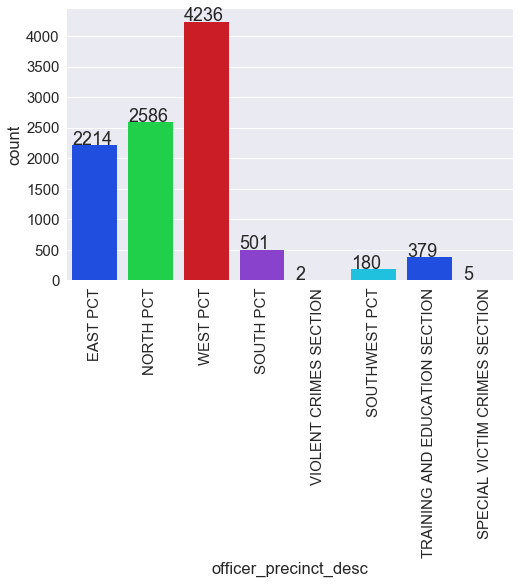

In [42]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8,5))
ax = sns.countplot(officer_id_reported_ge100.officer_precinct_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+10, '%.0f'%(height), rotation=0)
plt.show()

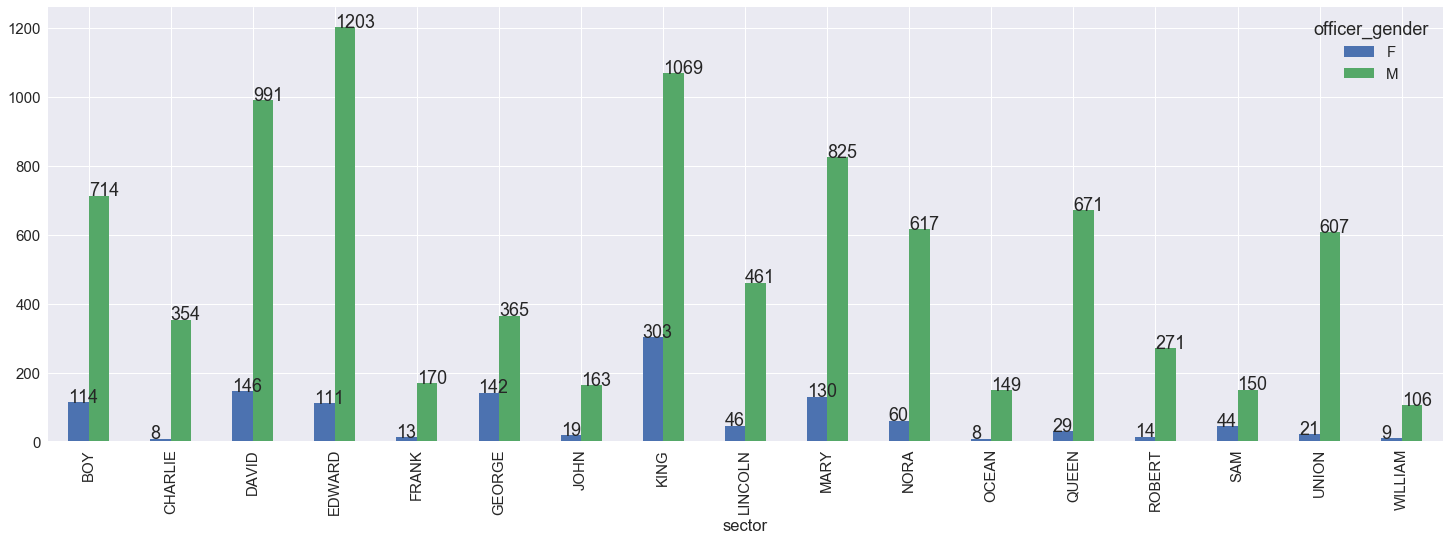

In [43]:
crosstab = pd.crosstab(index=officer_id_reported_ge100['sector'],columns=officer_id_reported_ge100['officer_gender'])
ax = crosstab.plot(kind='bar',figsize=(25,8), stacked=False)
for p in ax.patches:
    height = p.get_height()
    if(height > 1):
        ax.text(p.get_x(), height, '%.0f'%(height))
plt.show()

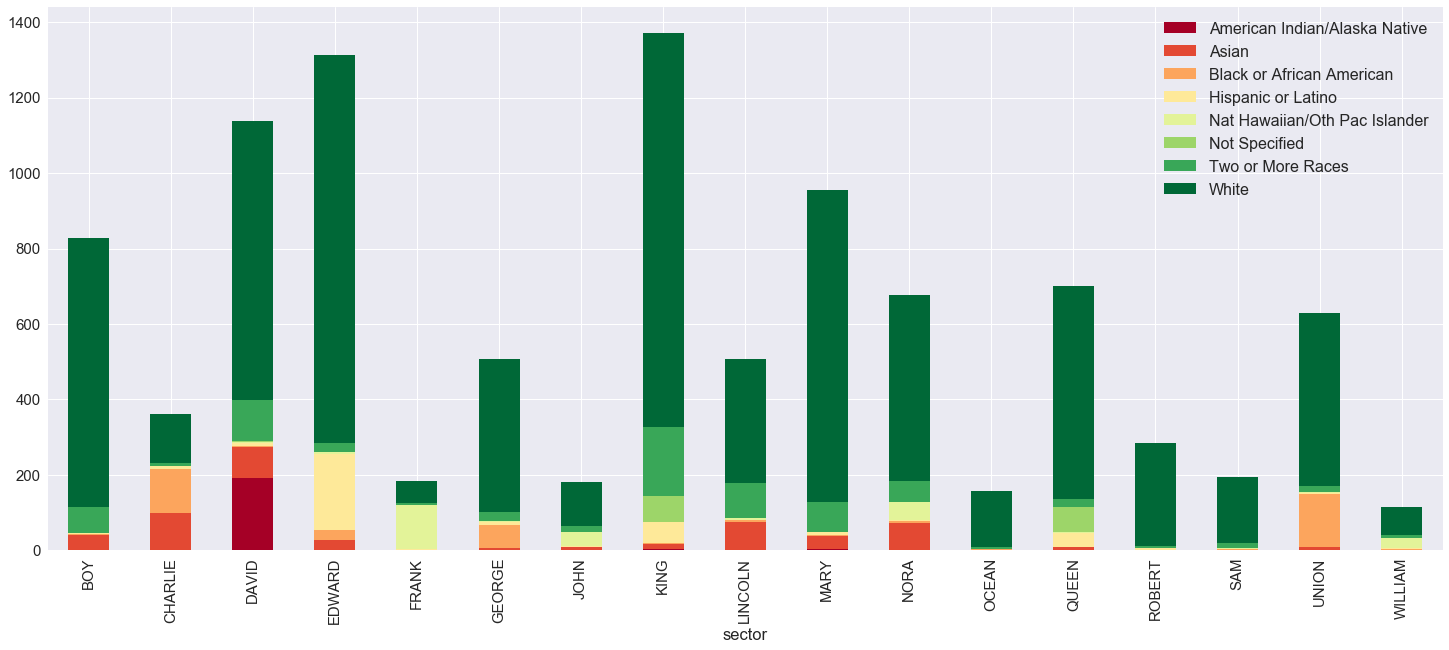

In [44]:
crosstab = pd.crosstab(index=officer_id_reported_ge100['sector'],columns=officer_id_reported_ge100['officer_race'])
ax = crosstab.plot(kind='bar',figsize=(25,10), stacked=True, cmap=cmap)
plt.legend(fontsize=16)
plt.show()

In [45]:
print("Number of unique templates:",df.template_id.nunique())

Number of unique templates: 33586


In [46]:
template_grp = df.groupby(['template_id']).size().to_frame('size').reset_index().sort_values(['size'],ascending=[False])

In [47]:
template_grp_ge2 = template_grp[template_grp['size'] >= 2]

In [48]:
template_grp_ge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 10279 to 31577
Data columns (total 2 columns):
template_id    5874 non-null int64
size           5874 non-null int64
dtypes: int64(2)
memory usage: 137.7 KB


In [49]:
template_grp_ge2.describe(include='all')

template_id         size
count    5874.000000  5874.000000
mean   248582.497106     2.213483
std    131923.973357     0.510455
min     43662.000000     2.000000
25%    133550.750000     2.000000
50%    238607.500000     2.000000
75%    361805.500000     2.000000
max    494462.000000     6.000000

In [50]:
df_template_grp_ge2 = df[~df.template_id.isin(template_grp_ge2.template_id)]

In [51]:
df_template_grp_ge2.describe(include='all')

beat call_type cit_certified_indicator cit_officer_arrived  \
count   27712     27712                   27712               27712   
unique     51         6                       2                   2   
top        K2       911                       N                   Y   
freq     1004     19428                   16261               21381   
first     NaN       NaN                     NaN                 NaN   
last      NaN       NaN                     NaN                 NaN   
mean      NaN       NaN                     NaN                 NaN   
std       NaN       NaN                     NaN                 NaN   
min       NaN       NaN                     NaN                 NaN   
25%       NaN       NaN                     NaN                 NaN   
50%       NaN       NaN                     NaN                 NaN   
75%       NaN       NaN                     NaN                 NaN   
max       NaN       NaN                     NaN                 NaN   

       cit_officer_dispatched cit_officer_requested             disposition  \
count                   27712                 27712                   27712   
unique                      2                     2                      15   
top                         N                     N  Emergent Detention/ITA   
freq                    14798                 25405                    9479   
first                     NaN                   NaN                     NaN   
last                      NaN                   NaN                     NaN   
mean                      NaN                   NaN                     NaN   
std                       NaN                   NaN                     NaN   
min                       NaN                   NaN                     NaN   
25%                       NaN                   NaN                     NaN   
50%                       NaN                   NaN                     NaN   
75%                       NaN                   NaN                     NaN   
max                       NaN                   NaN                     NaN   

                     final_call_type  \
count                          27712   
unique                           189   
top     --CRISIS COMPLAINT - GENERAL   
freq                           18932   
first                            NaN   
last                             NaN   
mean                             NaN   
std                              NaN   
min                              NaN   
25%                              NaN   
50%                              NaN   
75%                              NaN   
max                              NaN   

                                   initial_call_type    occured_date_time  \
count                                          27712                27712   
unique                                           185                27370   
top     SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS  2016-03-05 17:23:04   
freq                                            5616                    5   
first                                            NaN  2012-04-23 14:45:57   
last                                             NaN  2018-10-23 17:30:53   
mean                                             NaN                  NaN   
std                                              NaN                  NaN   
min                                              NaN                  NaN   
25%                                              NaN                  NaN   
50%                                              NaN                  NaN   
75%                                              NaN                  NaN   
max                                              NaN                  NaN   

       officer_bureau_desc officer_gender    officer_id officer_precinct_desc  \
count                27712          27712  27712.000000                 27712   
unique                   6              2           NaN                    17   
top      OPERATIONS BURE

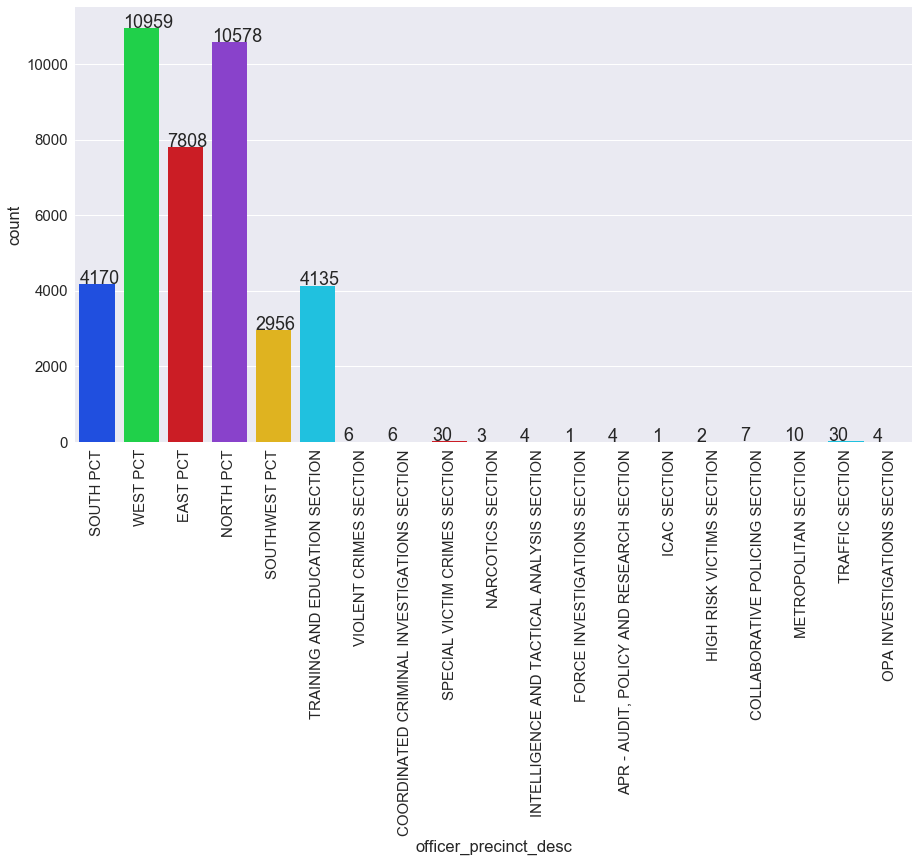

In [52]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
ax = sns.countplot(df.officer_precinct_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+10, '%.0f'%(height), rotation=0)
plt.show()

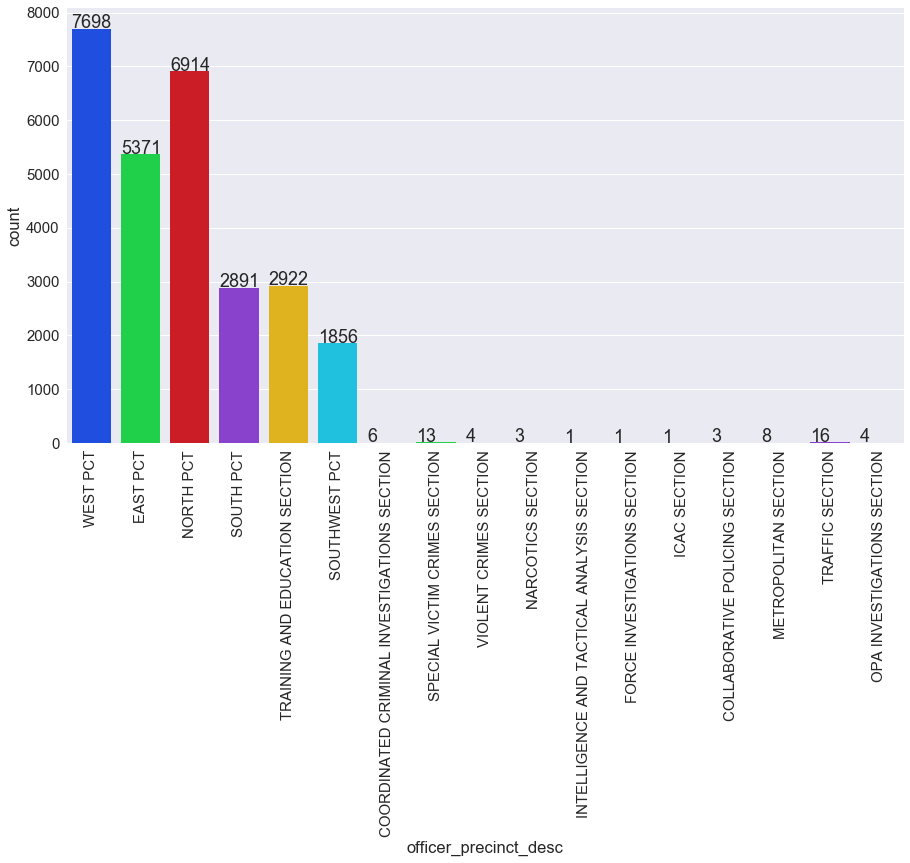

In [53]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,8))
ax = sns.countplot(df_template_grp_ge2.officer_precinct_desc, palette="bright")
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+10, '%.0f'%(height), rotation=0)
plt.show()

In [54]:
sector_precinct_officer_template_id_yrs_exp_ge30 = df[df['officer_years_of_experience_mean']>=30]\
    .groupby(['sector','precinct','officer_id','template_id','officer_years_of_experience_mean'])\
    .size()\
    .to_frame('size')\
    .reset_index()
    #.sort_values(['size'],ascending=[False])

In [55]:
sector_precinct_officer_template_id_yrs_exp_ge30.describe()

officer_id    template_id  officer_years_of_experience_mean        size
count  565.000000     565.000000                        565.000000  565.000000
mean   178.134513  220799.345133                         32.179351    1.267257
std     73.960237  135105.946567                          1.960388    0.553269
min     27.000000   43897.000000                         30.000000    1.000000
25%    115.000000  106343.000000                         30.350000    1.000000
50%    188.000000  181987.000000                         31.590164    1.000000
75%    234.000000  327491.000000                         34.371429    1.000000
max    329.000000  494878.000000                         42.000000    5.000000

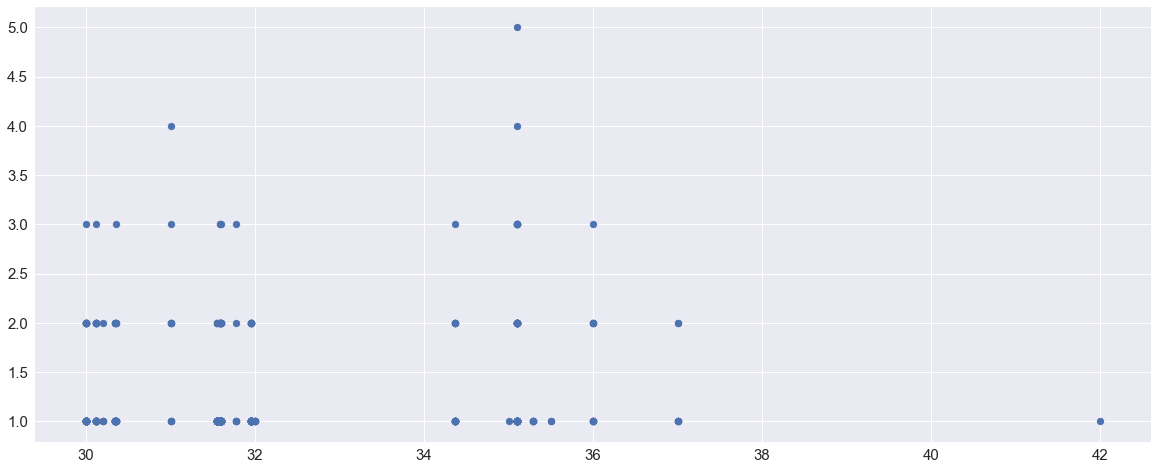

In [56]:
plt.scatter(sector_precinct_officer_template_id_yrs_exp_ge30['officer_years_of_experience_mean'],\
            sector_precinct_officer_template_id_yrs_exp_ge30['size'],\
            marker="o")
plt.show()

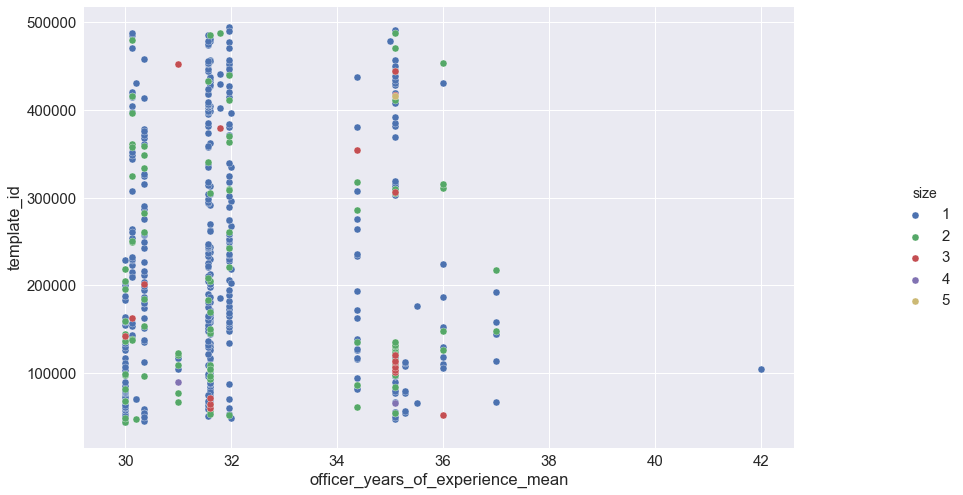

In [57]:
g=sns.pairplot(x_vars=['officer_years_of_experience_mean'],\
             y_vars=['template_id'], data=sector_precinct_officer_template_id_yrs_exp_ge30,\
             hue="size", size=5)
g.fig.set_size_inches(15,8)
plt.show()

In [58]:
sector_precinct_officer_template_id_yrs_exp_ge20_lt30 = df[(df['officer_years_of_experience_mean']>=20) \
                                                      & (df['officer_years_of_experience_mean']<30)]\
    .groupby(['sector','precinct','officer_id','template_id','officer_years_of_experience_mean'])\
    .size()\
    .to_frame('size')\
    .reset_index()

In [59]:
sector_precinct_officer_template_id_yrs_exp_ge20_lt30.describe()

officer_id    template_id  officer_years_of_experience_mean  \
count  2775.000000    2775.000000                       2775.000000   
mean    605.749910  235433.047207                         24.066573   
std     146.181069  132294.606369                          2.532317   
min     264.000000   43946.000000                         20.000000   
25%     456.000000  120268.000000                         21.677966   
50%     645.000000  214175.000000                         23.418605   
75%     721.000000  343821.500000                         26.434783   
max     853.000000  494649.000000                         29.684211   

              size  
count  2775.000000  
mean      1.301982  
std       0.595870  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       6.000000

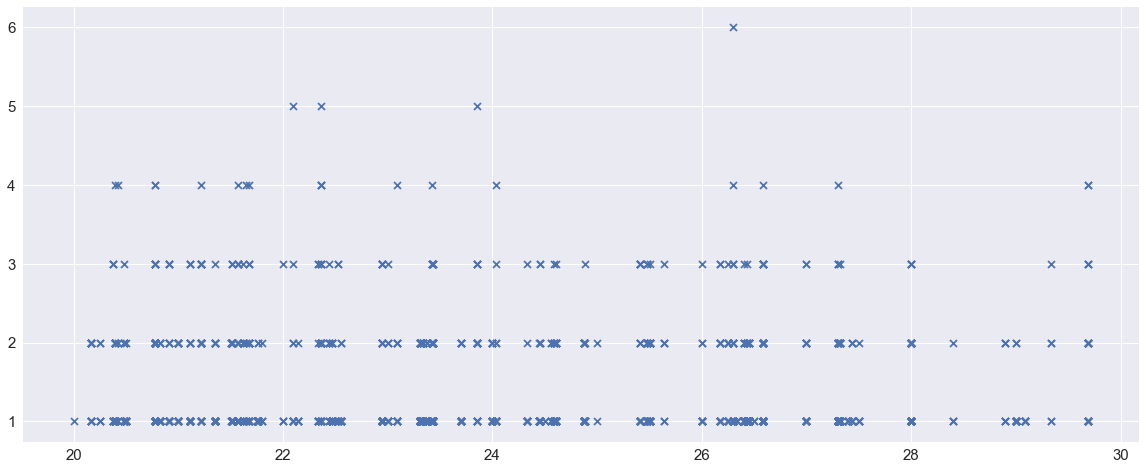

In [60]:
#scatter_plt_gt2 = sector_precinct_officer_template_id_yrs_exp_ge20_lt30\
#[sector_precinct_officer_template_id_yrs_exp_ge20_lt30['size']>2]
plt.scatter(sector_precinct_officer_template_id_yrs_exp_ge20_lt30['officer_years_of_experience_mean'],\
            sector_precinct_officer_template_id_yrs_exp_ge20_lt30['size'],marker="x")
plt.show()

In [61]:
sector_precinct_officer_template_id_yrs_exp_ge10_lt20 = df[(df['officer_years_of_experience_mean']>=10) \
                                                      & (df['officer_years_of_experience_mean']<20)]\
    .groupby(['sector','precinct','officer_id','template_id','officer_years_of_experience_mean'])\
    .size()\
    .to_frame('size')\
    .reset_index()

In [62]:
sector_precinct_officer_template_id_yrs_exp_ge10_lt20.describe()

officer_id    template_id  officer_years_of_experience_mean  \
count  4291.000000    4291.000000                       4291.000000   
mean   1135.487066  241336.382661                         14.819583   
std     269.617352  132953.641052                          3.152562   
min     247.000000   44112.000000                         10.000000   
25%     950.000000  125323.500000                         11.076923   
50%    1088.000000  223180.000000                         15.743363   
75%    1203.000000  353906.500000                         17.710843   
max    2483.000000  494782.000000                         19.882353   

              size  
count  4291.000000  
mean      1.233046  
std       0.524228  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       5.000000

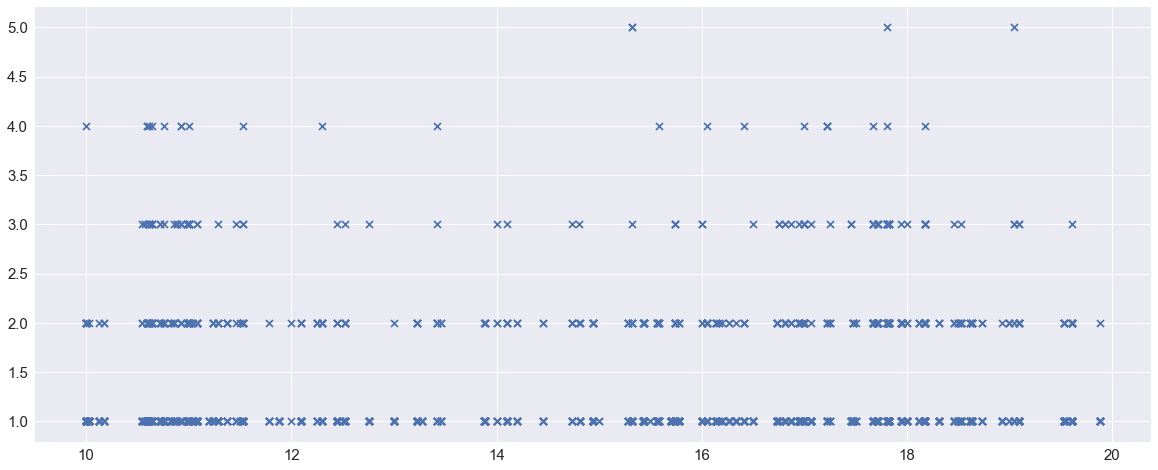

In [63]:
plt.scatter(sector_precinct_officer_template_id_yrs_exp_ge10_lt20['officer_years_of_experience_mean'],\
            sector_precinct_officer_template_id_yrs_exp_ge10_lt20['size'],marker="x")
plt.show()

In [64]:
sector_precinct_officer_template_id_yrs_exp_ge1_lt10 = df[(df['officer_years_of_experience_mean']>=1) \
                                                      & (df['officer_years_of_experience_mean']<10)]\
    .groupby(['sector','precinct','officer_id','template_id','officer_years_of_experience_mean'])\
    .size()\
    .to_frame('size')\
    .reset_index()

In [65]:
sector_precinct_officer_template_id_yrs_exp_ge1_lt10.describe()

officer_id    template_id  officer_years_of_experience_mean  \
count  20120.000000   20120.000000                      20120.000000   
mean    1870.574056  246392.308052                          3.562350   
std      339.117369  129817.937203                          2.447556   
min        7.000000   43469.000000                          1.000000   
25%     1729.000000  137619.750000                          1.717949   
50%     1819.000000  229059.000000                          2.862500   
75%     2105.000000  355233.750000                          4.000000   
max     4883.000000  494818.000000                          9.939394   

               size  
count  20120.000000  
mean       1.203628  
std        0.501042  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        6.000000

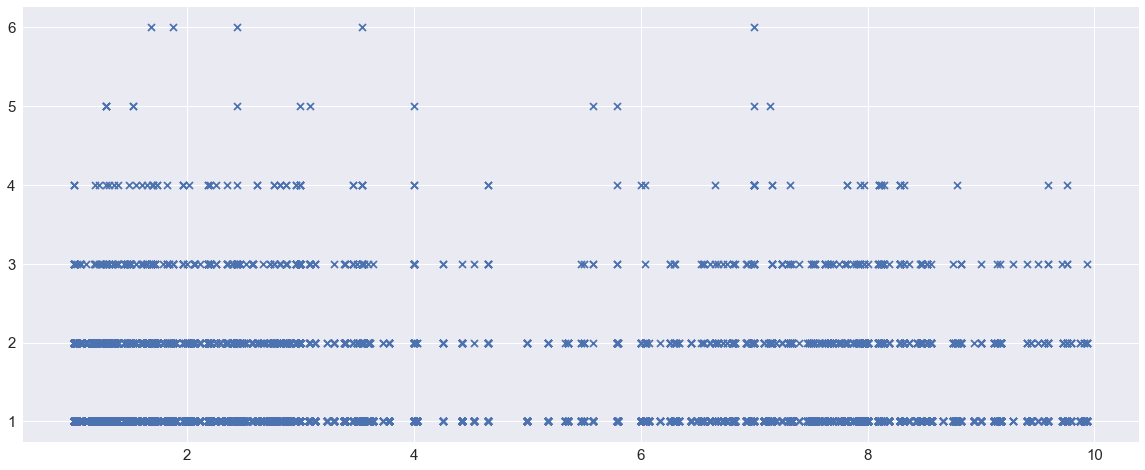

In [66]:
plt.scatter(sector_precinct_officer_template_id_yrs_exp_ge1_lt10['officer_years_of_experience_mean'],\
            sector_precinct_officer_template_id_yrs_exp_ge1_lt10['size'],marker="x")
plt.show()

### Correlation between officer_years_of_experience_mean and template_id

In [67]:
df['officer_years_of_experience_mean'].corr(df['template_id'])

-0.1568790422783287

### Correlation between officer_year_of_birth and template_id

In [68]:
df['officer_year_of_birth'].corr(df['template_id'])

0.15599605604016306

### We conclude data analysis section.

## Time Analysis.

### Will be continued in the next notebook.